<a href="https://colab.research.google.com/github/StefaniaRojas/Mineria-de-datos/blob/main/Entrega.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color= blue> <b> Análisis Descriptivo y Modelamiento de Series de Tiempo </b> </i> <font> 

###### **Presentado por:**
> Laura Carolina Rincón Ochoa\
  Stefanía Rojas García

Para el análisis y modelamiento de las series de tiempo, se utilizaron datos diarios de la temperatura en Bogotá desde el 01 de enero del 2017 hasta el 31 de diciembre del 2021 y datos trimestrales del Producto Interno Bruto de Colombia (PIB) desde el primer trimestre del 2005 hasta el último trimestre del 2021.



In [172]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [173]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [174]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [175]:
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats
import seaborn as sns
import matplotlib as mpl
import io, requests
import plotly.express as px
import matplotlib.pylab as plt
import statsmodels as sm
import pmdarima as pm
import math
from matplotlib import pyplot
from matplotlib.pyplot import figure
from matplotlib.pylab import rcParams
from sklearn.impute import KNNImputer
from statsmodels.tsa.api import STLForecast
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import month_plot,quarter_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.arima_model import ARIMA

In [176]:
import rpy2.robjects as robjects
%reload_ext rpy2.ipython

### <font color= F30720> <b> <i> Producto Interno Bruto de Colombia (PIB) trimestral entre 2005 y 2021 </i> </b> </font>
Esta serie cuenta con un total de 68 registros, 4 registros asociados a cada año comprendido en este periodo de tiempo. 
Esta serie fue extraída de la base de datos del [DANE](https://www.dane.gov.co/index.php/estadisticas-por-tema/cuentas-nacionales/cuentas-nacionales-trimestrales/historicos-producto-interno-bruto-pib), se tuvieron en cuenta los valores trimestrales del PIB (en millones de pesos) registrados en Colombia. El PIB que se usó para este análisis esta desagregado en 11 grupos, algunos de estos son: Industrias manufactureras, actividades inmobiliarias, construcción, entre otros.


#### <font color= #199EDC> <b> Importación de datos  </b> </font>

In [177]:
pib = pd.read_csv("/content/drive/Shareddrives/Series/PIB.csv", sep=';', header=0, decimal = ',')
Fecha = pd.date_range(start='2005-03-01', end='2021-12-31', freq='3M')
pib['Fecha'] = Fecha
pib = pib.set_index('Fecha')
pibst = pib['PIB']
print(type(pibst))
print(pibst.head())

<class 'pandas.core.series.Series'>
Fecha
2005-03-31    81213.24360
2005-06-30    83953.55526
2005-09-30    85294.67979
2005-12-31    87496.52124
2006-03-31    89908.93153
Name: PIB, dtype: float64


Text(0.5, 0, 'Trimestre')

Text(0, 0.5, 'PIB')

Text(0.5, 1.0, 'Serie del Producto Interno Bruto de Colombia')

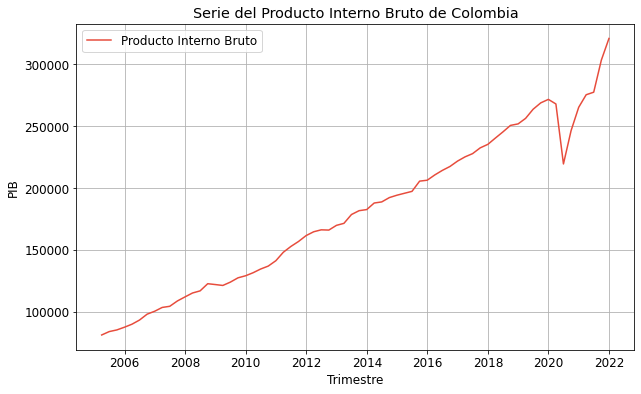

In [178]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(pibst, color='#E74C3C', label='Producto Interno Bruto')
ax.set_xlabel('Trimestre')
ax.set_ylabel('PIB')
ax.set_title('Serie del Producto Interno Bruto de Colombia')
ax.grid(True)
ax.legend(loc='upper left')

Al observar el gráfico la serie parece tener tendencia deterministica lineal positiva, no parece ser estacionaria ni presentar ciclos.   

#### <font color= #199EDC> <b> Transformación de Box-Cox para estabilizar la varianza marginal </b> </font>
Para verificar si la serie presenta varianza marginal constante o no , se realiza una transformación de Box-Cox. Teniendo que

$$
	f_{\lambda}(u_{t})= \begin{cases}
		\lambda^{-1}(u^{\lambda}_{t}-1), &  \text{si  $u_{t} \geq 0$, para $\lambda>0$,}\\
		\ln(u_{t}), &\text{ si $u_{t}>0$, para $\lambda=0$}.
	\end{cases}
$$

El valor de $λ$ se obtiene de  

In [179]:
sp.stats.boxcox(pibst,alpha=0.05)

(array([490.19935274, 498.17306056, 502.02650579, 508.28587872,
        515.05128175, 524.30376943, 537.14364406, 543.46166298,
        551.43428009, 553.80406365, 564.78856016, 573.03429817,
        580.8447408 , 584.99570344, 598.91110804, 597.27711875,
        595.5606201 , 601.93748765, 610.07332813, 613.96041641,
        619.54272594, 626.37739513, 631.73619905, 641.41294474,
        656.28268392, 666.29470957, 674.73185078, 684.64509659,
        690.94946075, 694.14022532, 693.74956355, 701.44387424,
        704.67936001, 718.76995318, 724.80860827, 726.53989745,
        736.69928116, 738.40249184, 745.00814166, 748.63717525,
        751.53005386, 754.40525038, 769.5864113 , 770.95401353,
        778.66175656, 785.19763903, 790.8191727 , 798.50170972,
        804.42186791, 808.9312981 , 816.93007473, 821.74156869,
        830.23020842, 838.53612251, 847.2978221 , 849.29211234,
        856.51413334, 868.41806918, 876.62139537, 881.08705143,
        875.22726894, 794.41964086, 840.

A continuación se realiza la transformación usando el $\lambda$ dado de $\lambda(u_{t})=		\lambda^{-1}(u^{\lambda}_{t}-1)$

In [180]:
#Transformación Box-Cox
tpib = sp.stats.boxcox(pibst,lmbda= 0.48419553841219776)
tpib = pib.assign(tpib = tpib) 
tpibst =  tpib['tpib'] 
print(type(tpibst))
tpibst.head()

<class 'pandas.core.series.Series'>


Fecha
2005-03-31    490.199353
2005-06-30    498.173061
2005-09-30    502.026506
2005-12-31    508.285879
2006-03-31    515.051282
Name: tpib, dtype: float64

In [181]:
sp.stats.boxcox(tpibst,alpha=0.05)

(array([487.4414453 , 495.38103262, 499.2179569 , 505.45045057,
        512.18674168, 521.39931648, 534.18361736, 540.47421264,
        548.41215219, 550.77161284, 561.70816952, 569.91782373,
        577.6940121 , 581.82674039, 595.68087028, 594.05408768,
        592.34515632, 598.69389397, 606.79377785, 610.6636606 ,
        616.22123139, 623.02556473, 628.36054754, 637.9941988 ,
        652.79752176, 662.76469738, 671.16396297, 681.032614  ,
        687.30856647, 690.4849362 , 690.09603741, 697.75559748,
        700.9764531 , 715.00321311, 721.01445349, 722.73787645,
        732.85104334, 734.54649635, 741.12203365, 744.73450675,
        747.6141755 , 750.47623533, 765.58790957, 766.94924187,
        774.62161679, 781.12746723, 786.7231403 , 794.3702911 ,
        800.26314597, 804.75175888, 812.71356755, 817.50279824,
        825.95211295, 834.21949072, 842.94047796, 844.92549275,
        852.11389717, 863.96233209, 872.12734564, 876.57212316,
        870.73973404, 790.30703085, 835.

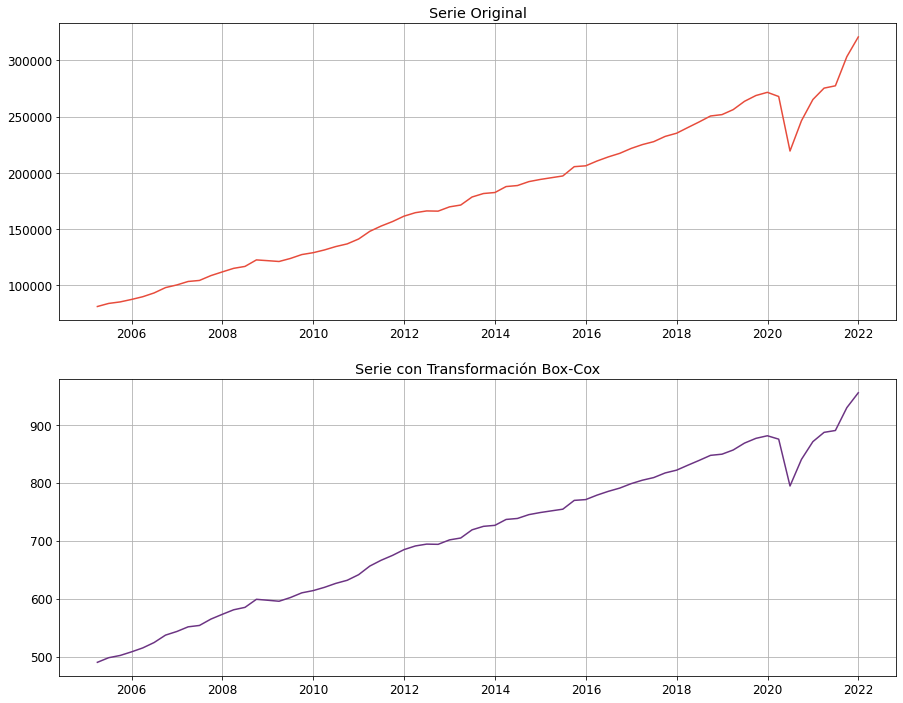

In [182]:
InteractiveShell.ast_node_interactivity = "last"
plt.rc('font', size=12)
fig, axes = plt.subplots(2,1,figsize=(15,12)) 
axes[0].plot(pib['PIB'], color='#E74C3C', label='PIB')
axes[0].title.set_text('Serie Original')
axes[0].grid(True)
axes[1].plot(tpibst, color='#6C3483')
axes[1].title.set_text('Serie con Transformación Box-Cox')
axes[1].grid(True)
plt.show()

Se puede observar como la escala de la serie transformada disminuye considerablemente en comparación a la serie original. Por lo tanto, el análisis se realiza respecto a la serie transformada.

#### <font color= 199EDC> <b> Análisis de Tendencia </b> </font>
A partir de lo descrito anteriormente, se ajusta una regresión lineal a la serie de tiempo, para observar si explica adecuadamente la tendencia.
$$Y_t = \beta_0 + \beta_1 X_t $$

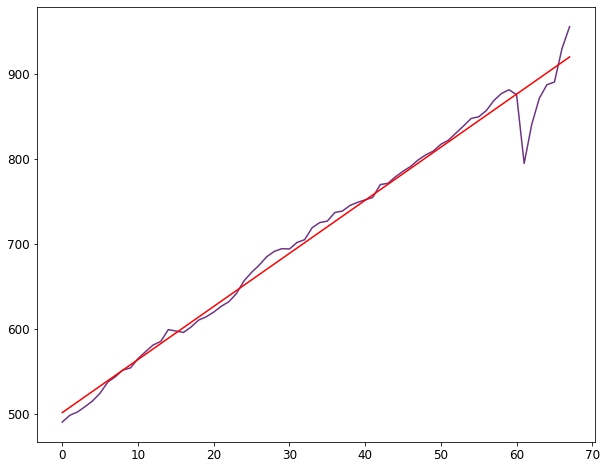

[24.97392544]
-49549.41997214329


In [183]:
X1=np.arange(2004.12,2021,1/4)
X=X1
plt.figure(figsize=(10, 8))
from sklearn.linear_model import LinearRegression
X = np.reshape(X, (len(X), 1))
y = tpibst.values
model = LinearRegression()
model.fit(X, y)
trend = model.predict(X)
plt.plot(y, color ='#6C3483')
plt.plot(trend, color ='red')
plt.show()
print(model.coef_)
print(model.intercept_)

Como se esperaba la serie presenta una tendencia lineal, la cual fue descrita por la regresión lineal planteada anteriormente. Por lo tanto, se usa este resultado para obtener la serie sin tendencia.

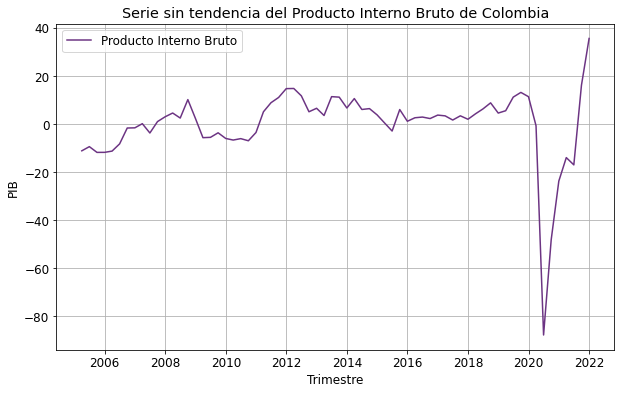

In [184]:
# detrend
detrended = [y[i]-trend[i] for i in range(0, len(tpibst))]
npibst=pd.Series(detrended,index=tpibst.index)

# plot detrended
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(npibst, color='#6C3483', label='Producto Interno Bruto')
ax.set_xlabel('Trimestre')
ax.set_ylabel('PIB')
ax.set_title('Serie sin tendencia del Producto Interno Bruto de Colombia')
ax.grid(True)
ax.legend(loc='upper left')

La serie se ve un poco más estacionaria, sin embargo se sigue observando la presencia de posibles valores atípicos.

#### <font color= #199EDC> <b> Datos atípicos  </b> </font>

Para visualizar la presencia de datos atípicos se utiliza un diagrama de caja.



Valores atípicos
Fecha
2020-06-30   -87.756203
2020-09-30   -48.118503
2020-12-31   -23.705572
2021-12-31    35.620106
dtype: float64


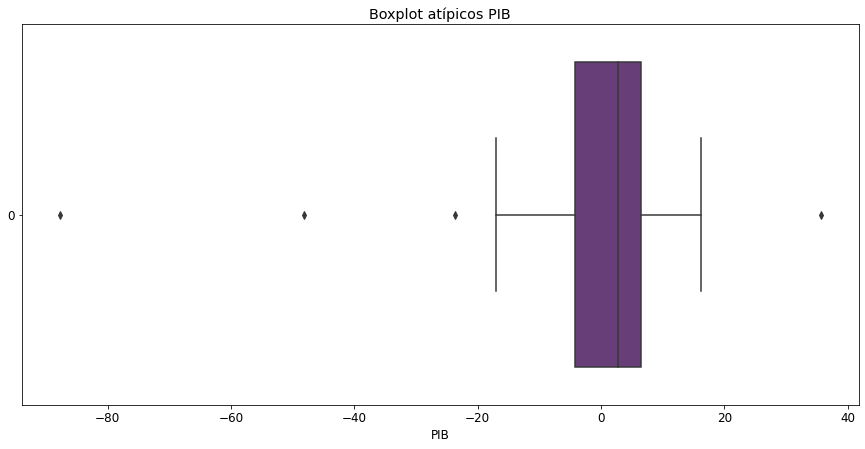

In [185]:
plt.figure(figsize=(15, 7))
g = sns.boxplot(data=npibst,orient="h", color ='#6C3483')
g.set_title('Boxplot atípicos PIB')
g.set_xlabel('PIB')
npibst.describe()
IQR = 6.467394e+00+4.164357e+00
upper = 6.467394e+00+1.5*IQR
lower = -4.164357e+00-1.5*IQR
print()
print()
print('Valores atípicos')
print(npibst[(npibst<lower)+(npibst>upper)])

Se presentan 4 datos atípicos, en las siguientes fechas con su respectivo valor de  PIB: 

*   2020-06-30  &nbsp;&nbsp;&nbsp;&nbsp;   -87.756203
*   2020-09-30  &nbsp;&nbsp;&nbsp;&nbsp;   -48.118503
*   2020-12-31  &nbsp;&nbsp;&nbsp;&nbsp;   -23.705572
*   2021-12-31  &nbsp;&nbsp;&nbsp;&nbsp;    35.620106

#### <font color =199EDC> <b> Gráficos de Autocorrelación </b> </font>
Se realiza un gráfico de autocorrelaciones simples y uno de autocorrelaciones parciales para la serie del PIB transformada. Esto permitirá observar cuantos retardos son significativos.


/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


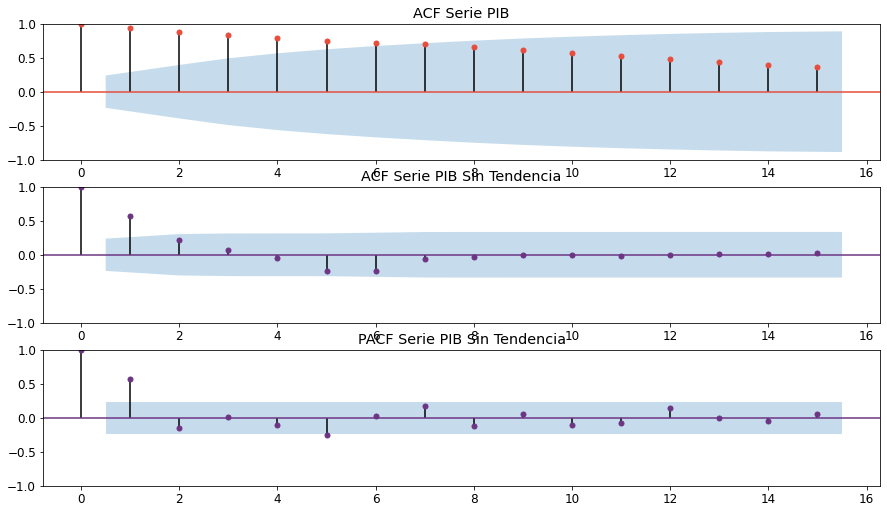

In [186]:
InteractiveShell.ast_node_interactivity = "last"
fig, axes = plt.subplots(3,1,figsize=(15,8.5)) 
a=plot_acf(pibst,adjusted=False,lags=15,title='ACF Serie PIB',ax=axes[0], color='#E74C3C')
b=plot_acf(npibst,adjusted=False,lags=15,title='ACF Serie PIB Sin Tendencia',ax=axes[1], color='#6C3483')
d=plot_pacf(npibst,lags=15,title='PACF Serie PIB Sin Tendencia',ax=axes[2], color = '#6C3483')
plt.show()
InteractiveShell.ast_node_interactivity = "all"

Como se puede observar en el gráfico, las autocorrelaciones simples disminuyen mucho más rápido en la serie sin tendencia, por lo tanto se podría decir que la tendencia que se ajusto es adecuada. Además el único retardo significativo es el 1, por lo que probablemente un proceso MA(1) modelaría la serie de una forma apropiada.\
En cuanto a las autocorrelaciones parciales, se obtuvo que el retardo que puede llegar a ser relevante es el retardo 3, debido a que es el primer valor que se encuentra más cercano a cero. Además el único retardo significativo es el 1, por lo que probablemente un proceso AR(1) modelaría la serie una forma apropiada, tambien se podría ajustar un AR(5).

#### <font color= 199EDC> <b> Gráfico de Retardos </b> </font>

<Figure size 1296x720 with 0 Axes>

Text(0.5, 1.0, 't vs t-1')

Text(0.5, 1.0, 't vs t-2')

Text(0.5, 1.0, 't vs t-3')

Text(0.5, 1.0, 't vs t-4')

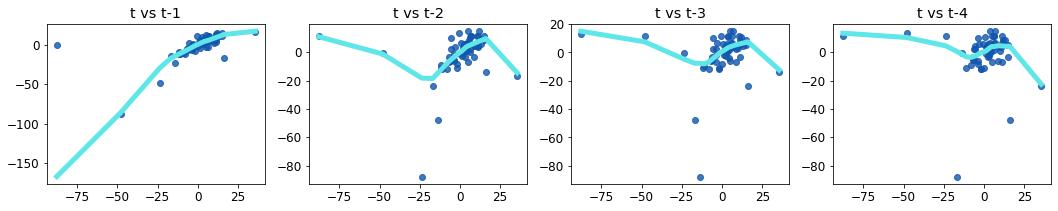

In [187]:
values = pd.DataFrame(npibst.values)
lags = 4
columns = [values]
for i in range(1,(lags + 1)):
	columns.append(values.shift(i))
dataframe = pd.concat(columns, axis=1)
columns = ['t']
for i in range(1,(lags + 1)):
	columns.append('t-' + str(i))
dataframe.columns = columns

plt.figure(2,(18, 10))
for i in range(1,(lags + 1)):
	ax = plt.subplot(3,4,i)
	ax.set_title('t vs t-' + str(i))
	sns.regplot(x=dataframe['t'].values, y=dataframe['t-'+str(i)].values,color="#1256AD",lowess=True, 
            line_kws={"color":"#5EE6E8", "linewidth":5})
plt.show()

Los retardos y los valores trimestrales del PIB no parecen presentar una correlación lineal entre ellos.

#### <font color= 199EDC> <b> Raices unitarias </b> </font>

In [188]:
adfstat, pvalue, critvalues, resstore=adfuller(npibst,regression="nc",maxlag=4,autolag=None,store=True,regresults=True)
print(resstore.resols.summary())

resultadoadf1=adfuller(npibst,regression="nc", maxlag=4)
print('ADF Statistic: %f' % resultadoadf1[0])
print('P-value: %f' % resultadoadf1[1])
for key, value in resultadoadf1[4].items():
    print('\t%s: %.3f' % (key, value))

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.286
Model:                            OLS   Adj. R-squared (uncentered):              0.225
Method:                 Least Squares   F-statistic:                              4.655
Date:                Thu, 27 Oct 2022   Prob (F-statistic):                     0.00122
Time:                        00:27:33   Log-Likelihood:                         -244.89
No. Observations:                  63   AIC:                                      499.8
Df Residuals:                      58   BIC:                                      510.5
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:824: FutureWarning: trend 'nc' has been renamed to 'n' after 0.14 is released. Use 'n' now to avoid this warning.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:824: FutureWarning: trend 'nc' has been renamed to 'n' after 0.14 is released. Use 'n' now to avoid this warning.
  FutureWarning,


#### <font color= 199EDC> <b> Componente Estacional  </b> </font>

In [189]:
pm.arima.nsdiffs(npibst, 4 , max_D=2, test='ocsb')

0

Como la serie no presenta raices unitarias ordinarias ni estacionales se procede a realizar todo el modelamiento con la serie transformada.

#### <font color= 199EDC> <b> Ajustes del modelo </b> </font>
Para el ajuste de los modelos se usan 48 datos como conjunto de entrenamiento y 20 como conjunto de prueba, los cuales corresponden al 70% y 30% del total de los datos

#### <font color= 199EDC> <b> STL </b> </font>

Text(0, 0.5, 'PIB')

Text(0, 0.5, 'Tendencia')

Text(0, 0.5, 'Estacionalidad')

Text(0, 0.5, 'Residuos')

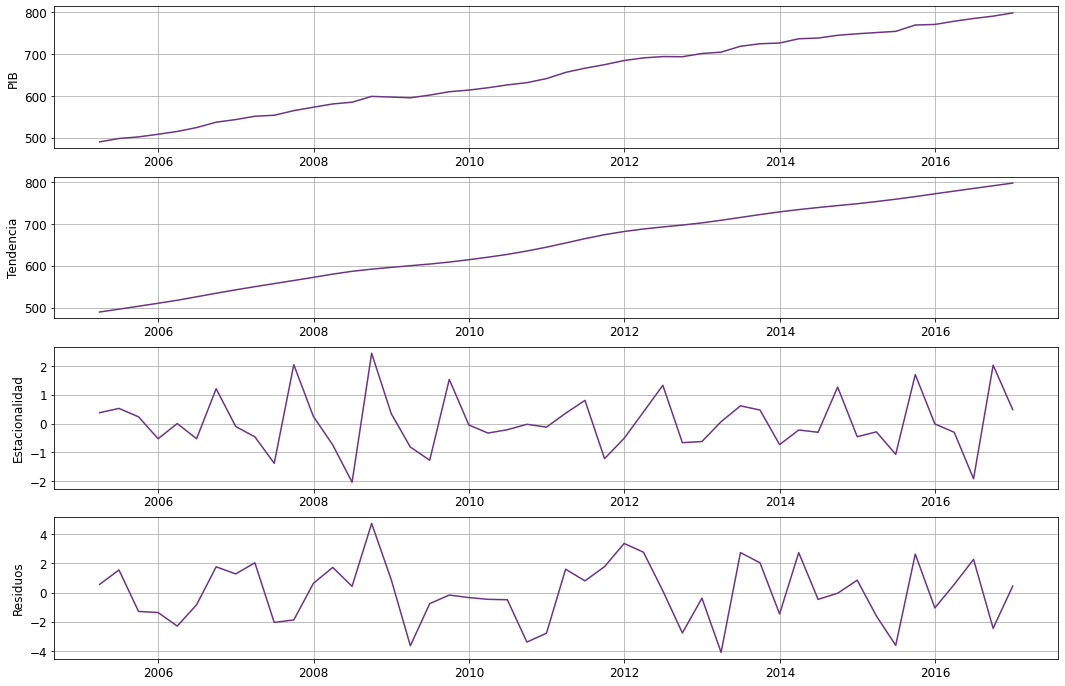

In [190]:
result = STL(tpibst[:48])
stl=result.fit()
InteractiveShell.ast_node_interactivity = "last"
plt.rc('font', size=12)
fig, axes = plt.subplots(4,1,figsize=(18,12)) 
axes[0].plot(tpibst[:48], color='#6C3483')
axes[0].set_ylabel('PIB')
axes[0].grid(True)
axes[1].plot(stl.trend, color='#6C3483')
axes[1].set_ylabel('Tendencia')
axes[1].grid(True)
axes[2].plot(stl.seasonal, color='#6C3483')
axes[2].set_ylabel('Estacionalidad')
axes[2].grid(True)
axes[3].plot(stl.resid, color='#6C3483')
axes[3].set_ylabel('Residuos')
axes[3].grid(True)
plt.show()

#### <font color= 199EDC> <b> Análisis de Residuales </b> </font>

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


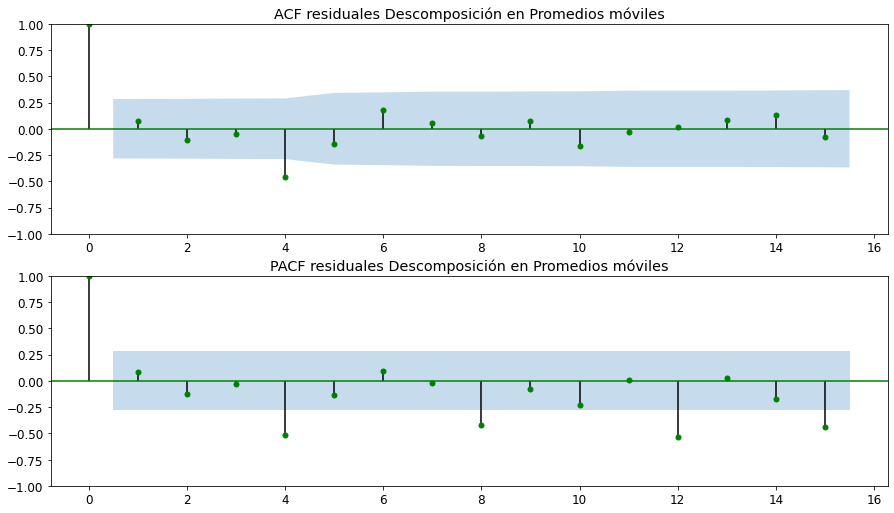

In [191]:
#####Análisis de Residuales######
residuales1 = stl.resid

InteractiveShell.ast_node_interactivity = "last"
fig, axes = plt.subplots(2,1,figsize=(15,8.5))

a = plot_acf(residuales1,adjusted=False,lags=15,title='ACF residuales Descomposición en Promedios móviles',ax=axes[0], color='green')
b = plot_pacf(residuales1, lags=15,title='PACF residuales Descomposición en Promedios móviles',ax=axes[1], color='green')




Como se observa en los gráficos de ACF una correlación queda sin ser explicada, sin embargo en el PACF los rezagos múltiplos de 4 parecen no ser explicados por este modelo.

#### <font color= 199EDC> <b> Suavizamiento Exponencial </b> </font>
El suavizamiento exponencial esta dado por
$$ X_t = m_t + S_t + \mathcal{E}_t$$
con
$$
\begin{aligned}
&a_t=\alpha\left(x_t-S_{t-p}\right)+(1-\alpha)\left(a_{t-1}+b_{t-1}\right) \\
&b_t=\beta\left(a_t-a_{t-1}\right)+(1-\beta) b_{t-1} \\
&s_t=\gamma\left(x_t-a_t\right)+(1-\gamma) S_{t-p}
\end{aligned}
$$


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)


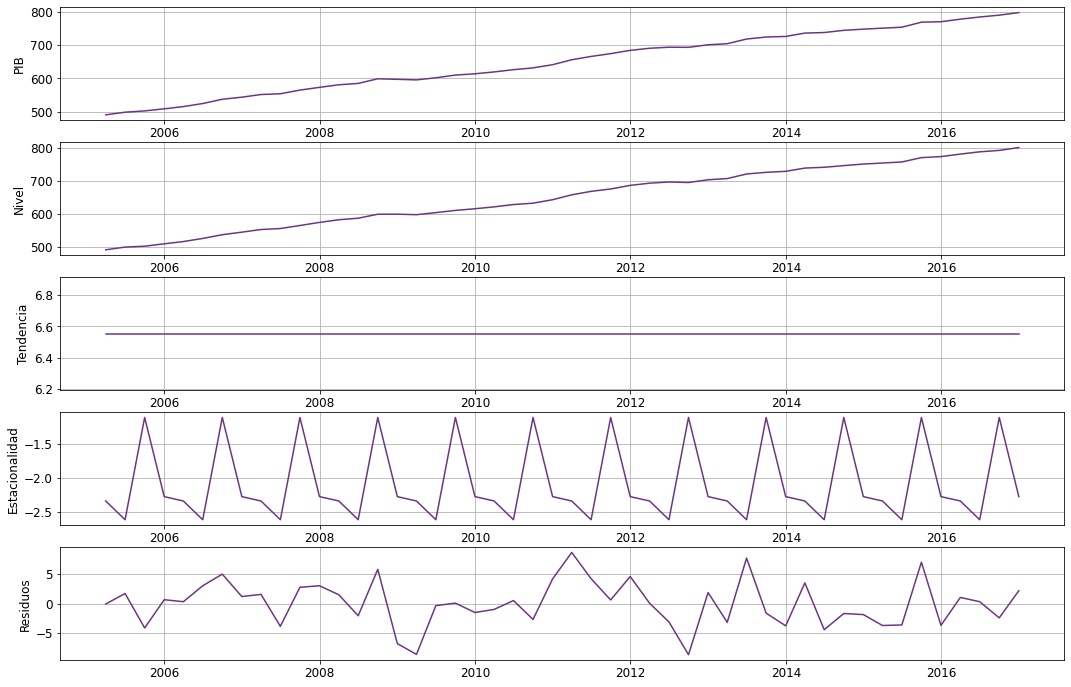

In [192]:
####Holt-Winters
expopib = ExponentialSmoothing(tpibst[:48], seasonal_periods=4, trend='add', seasonal='add',initialization_method="estimated",use_boxcox=False).fit()
InteractiveShell.ast_node_interactivity = "last"
plt.rc('font', size=12)
fig, axes = plt.subplots(5,1,figsize=(18,12)) 
axes[0].plot(tpibst[:48], color='#6C3483')
axes[0].set_ylabel('PIB')
axes[0].grid(True)
axes[1].plot(expopib.level, color='#6C3483')
axes[1].set_ylabel('Nivel')
axes[1].grid(True)
axes[2].plot(expopib.trend, color='#6C3483')
axes[2].set_ylabel('Tendencia')
axes[2].grid(True)
axes[3].plot(expopib.season, color='#6C3483')
axes[3].set_ylabel('Estacionalidad')
axes[3].grid(True)
axes[4].plot(expopib.resid, color='#6C3483')
axes[4].set_ylabel('Residuos')
axes[4].grid(True)
plt.show()

In [193]:
expopib.params_formatted

,name,param,optimized
smoothing_level,alpha,0.947860,True
smoothing_trend,beta,0.000000,True
smoothing_seasonal,gamma,0.000000,True
initial_level,l.0,486.061511,True
initial_trend,b.0,6.554230,True
initial_seasons.0,s.0,-2.339316,True
initial_seasons.1,s.1,-2.613050,True
initial_seasons.2,s.2,-1.118832,True
initial_seasons.3,s.3,-2.275470,True


#### <font color= 199EDC> <b> Análisis de Residuales </b> </font>

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


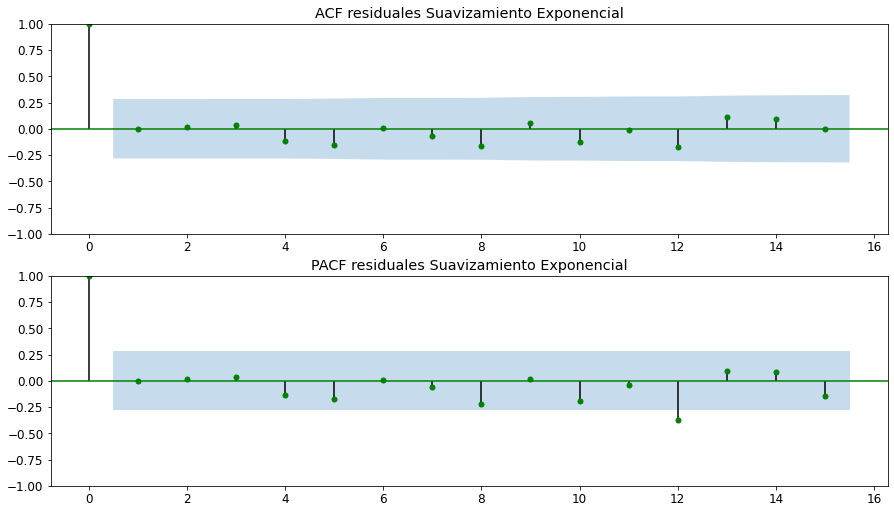

In [194]:
#####Análisis de Residuales######
residualesexp = expopib.resid

InteractiveShell.ast_node_interactivity = "last"
fig, axes = plt.subplots(2,1,figsize=(15,8.5))

a = plot_acf(residualesexp,adjusted=False,lags=15,title='ACF residuales Suavizamiento Exponencial',ax=axes[0], color='green')
b = plot_pacf(residualesexp, lags=15,title='PACF residuales Suavizamiento Exponencial',ax=axes[1], color='green')

Como se observa en los gráficos en ACF ninguna correlación queda sin ser explicada, sin embargo en el PACF el rezago 12 es significativo.

#### <font color= 199EDC> <b> Modelo ARMA (p,q) </b> </font>

Como se habia mencionado anteriormente al observar las autocorrelaciones simples y parciales se podrían ajustar procesos AR(1), AR(5), MA(1) y de igual manera un proceso ARMA mixto con ordenes máximos dados por p = 5 y q = 1.  

#### <font color= 199EDC> <b> Modelo AR </b> </font>

In [195]:
###Estimación de de los parámetros de la serie simulada
###Vamos a empezar, ajustando un modelo AR(5)
AR5= sm.tsa.statespace.sarimax.SARIMAX(npibst[:48], trend='c', order=[5,0,0])  
AR51= sm.tsa.statespace.sarimax.SARIMAX(npibst[:48], trend='n', order=[5,0,0])  
AR4= sm.tsa.statespace.sarimax.SARIMAX(npibst[:48], trend='n', order=[4,0,0])
AR3= sm.tsa.statespace.sarimax.SARIMAX(npibst[:48], trend='n', order=[3,0,0])
AR2= sm.tsa.statespace.sarimax.SARIMAX(npibst[:48], trend='n', order=[2,0,0])
AR1=sm.tsa.statespace.sarimax.SARIMAX(npibst[:48], trend='n', order=[1,0,0])

#order=[p,d,q]
####Si tiene parte estacional agregar seasonal_order=(0,0,0,12)
resultauto = AR5.fit()
resultauto1 = AR51.fit()
resultauto2 = AR4.fit()
resultauto3 = AR3.fit()
resultauto4 = AR2.fit()
resultauto5 = AR1.fit()
print(resultauto.summary(),resultauto1.summary(),resultauto2.summary(),resultauto3.summary(),resultauto4.summary(),resultauto5.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self.

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   48
Model:               SARIMAX(5, 0, 0)   Log Likelihood                -132.766
Date:                Thu, 27 Oct 2022   AIC                            279.532
Time:                        00:27:36   BIC                            292.631
Sample:                    03-31-2005   HQIC                           284.482
                         - 12-31-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2000      0.506      0.396      0.692      -0.791       1.191
ar.L1          0.8278      0.157      5.280      0.000       0.520       1.135
ar.L2          0.1039      0.188      0.552      0.5

A partir de lo anterior se pudo comprobar que el modelo que mejor se ajusta es el AR(1).

#### <font color= 199EDC> <b> Análisis de Residuales </b> </font>

Se analizan los residuales del modelo autoregresivo de orden 1.

[[1.00787232 0.98768116]]
[[0.90377244 0.63642658 0.30499295 2.71750498]]


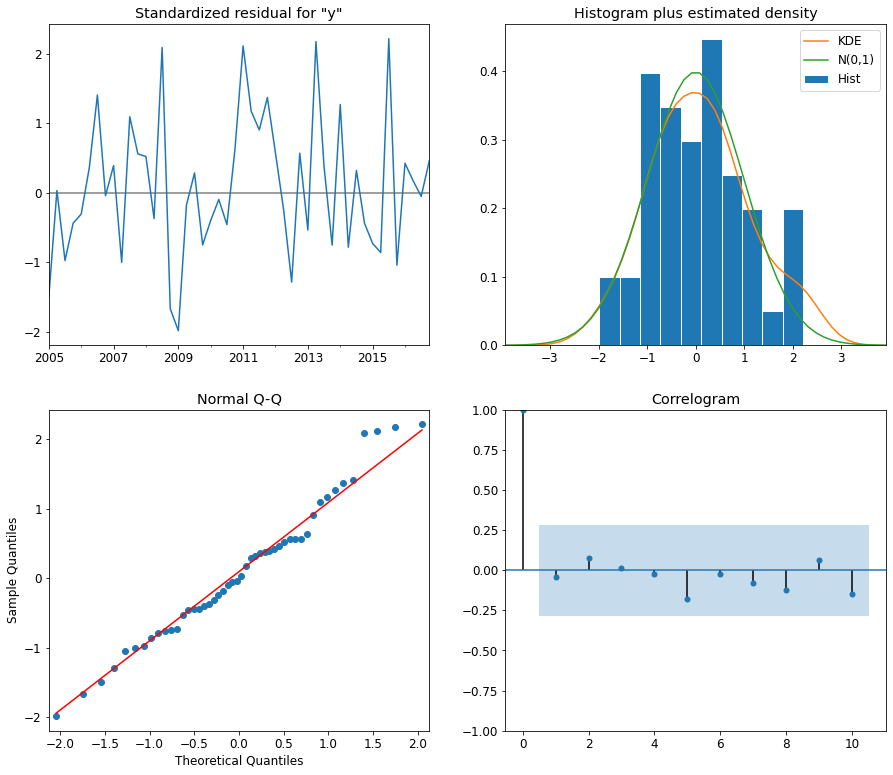

In [196]:
#####Análisis de Residuales######
results_final = AR1.fit()
residuales=results_final.resid
results_final.plot_diagnostics(figsize=(15,13))
## Hipótesis nula de no heterocedasticidad
print(results_final.test_heteroskedasticity(method='breakvar')) #[Est. de prueba, p-valor]
## Hipótesis nula de normalidad
print(results_final.test_normality(method='jarquebera'))
#1. Estadística de prueba
#2. El p valor
#3. Sesgo estimado de los datos
#4. Curtosis estimada
## Hipótesis nula indica que no se presenta correlación serial

#### <font color= 199EDC> <b> Modelo MA </b> </font>

In [197]:
###Estimación de de los parámetros de la serie simulada
###Vamos a empezar, ajustando un modelo MA(1)
MA1= sm.tsa.statespace.sarimax.SARIMAX(npibst[:48], trend='c', order=[0,0,1])
MA11= sm.tsa.statespace.sarimax.SARIMAX(npibst[:48], trend='n', order=[0,0,1])

presultprom = MA1.fit()
presultprom1 = MA11.fit()
print(presultprom.summary(),presultprom1.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   48
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -147.569
Date:                Thu, 27 Oct 2022   AIC                            301.138
Time:                        00:27:37   BIC                            306.751
Sample:                    03-31-2005   HQIC                           303.259
                         - 12-31-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.2266      1.209      1.015      0.310      -1.143       3.596
ma.L1          0.6530      0.133      4.893      0.000       0.391       0.915
sigma2        27.0922      7.089      3.822      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)


A partir de lo anterior se pudo comprobar que el modelo MA(1) si ajusta correctamente el modelo original.

#### <font color= 199EDC> <b> Análisis de Residuales </b> </font>

[[0.82720097 0.70895369]]
[[1.43632071 0.48764853 0.13161452 2.19447482]]


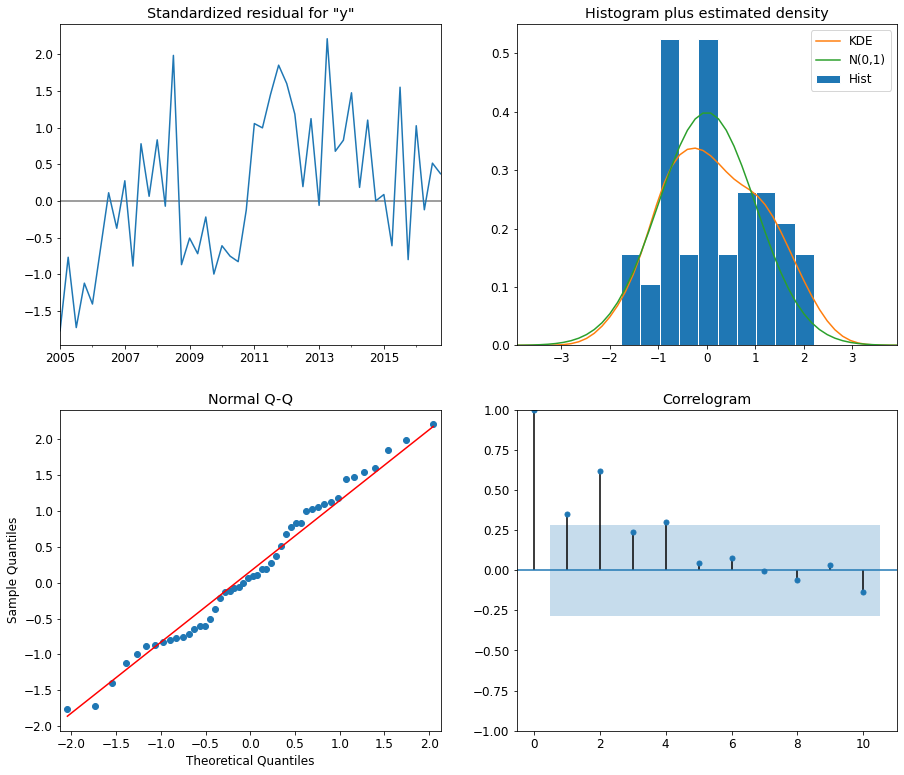

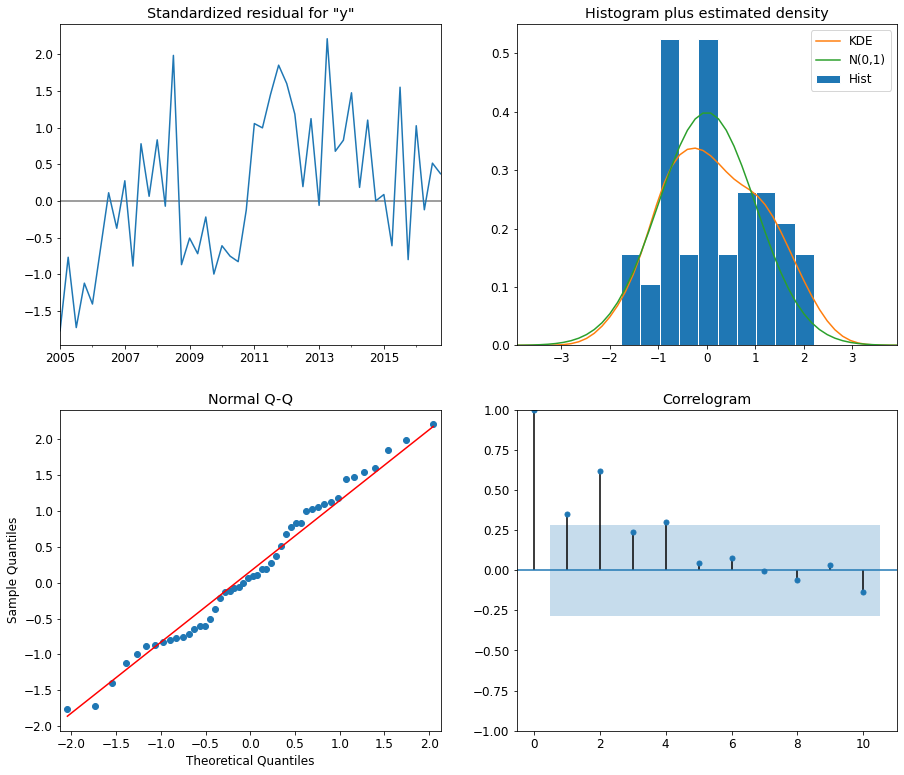

In [198]:
#####Análisis de Residuales######
results_final1 = MA11.fit()
residuales1=results_final1.resid

## Hipótesis nula de no heterocedasticidad
print(results_final1.test_heteroskedasticity(method='breakvar')) #[Est. de prueba, p-valor]
## Hipótesis nula de normalidad
print(results_final1.test_normality(method='jarquebera'))

#1. Estadística de prueba
#2. El p valor
#3. Sesgo estimado de los datos
#4. Curtosis estimada
## Hipótesis nula indica que no se presenta correlación serial
results_final1.plot_diagnostics(figsize=(15,13))
#plt.show()

Como se puede observar en el gráfico de autocorrelación, las correlación 1, 2 y 4 no se encuentran bien explicadas por el modelo.

#### <font color= 199EDC> <b> Modelo ARMA </b> </font>

In [199]:
###Estimación de de los parámetros de la serie simulada
###Vamos a empezar, ajustando un modelo ARMA(1,1)
ARMA= sm.tsa.statespace.sarimax.SARIMAX(npibst[:48], trend='c', order=[1,0,1])
ARMA1= sm.tsa.statespace.sarimax.SARIMAX(npibst[:48], trend='n', order=[1,0,1])
ARMA2= sm.tsa.statespace.sarimax.SARIMAX(npibst[:48], trend='n', order=[5,0,1])

presultarma = ARMA.fit()
presultarma1 = ARMA1.fit()
presultarma2 = ARMA2.fit()
print(presultarma.summary(),presultarma1.summary(),presultarma2.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self.

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   48
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -133.409
Date:                Thu, 27 Oct 2022   AIC                            274.818
Time:                        00:27:40   BIC                            282.303
Sample:                    03-31-2005   HQIC                           277.647
                         - 12-31-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0476      0.451      0.106      0.916      -0.835       0.931
ar.L1          0.8558      0.092      9.326      0.000       0.676       1.036
ma.L1         -0.0052      0.148     -0.035      0.9

Según lo anterior, el AR(1) y el MA(1) pareciera que fueran los que mejor ajustan el modelo. Sin embargo, se realiza un análisis adicional para seleccionar el mejor modelo.

In [200]:
auto = pm.auto_arima(npibst[:48],start_p=1,start_q=1,max_p=5,max_q=1,max_order=6,with_intercept=True,stepwise=False,stationary=True,seasonal=False,information_criterion='bic')
auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   48
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -133.410
Date:                Thu, 27 Oct 2022   AIC                            272.819
Time:                        00:27:43   BIC                            278.433
Sample:                    03-31-2005   HQIC                           274.941
                         - 12-31-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0494      0.451      0.110      0.913      -0.834       0.933
ar.L1          0.8543      0.086      9.936      0.000       0.686       1.023
sigma2        14.7846      3.247      4.553      0.000       8.420      21.149
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 0.88
Prob(Q):                              0.78   Prob(JB):                         0.64
Heteroskedasticity (H):               1.00   Skew:                             0.30
Prob(H) (two-sided):                  1.00   Kurtosis:                         2.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Con esto, se puede observar como el modelo que mejor se ajusta a la serie según el criterio BIC es el modelo autoregresivo de orden 1.

#### <font color= 199EDC> <b> Gráficos de sumas acumulativas  </b> </font>

In [201]:
##Residuales Estandarizados
Res_estand=results_final.standardized_forecasts_error.reshape(48,)

Text(0.5, 1.0, 'Estadística Cusum')

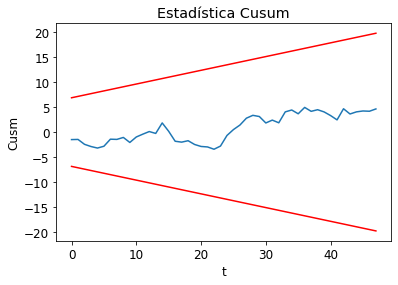

In [202]:
###Gráfico CUSUM
cum=Res_estand.cumsum()
N=len(Res_estand)
N
Af_cusum=0.948###Cuantil estadística cusum
LS=Af_cusum*math.sqrt(N)+2*Af_cusum*np.arange(1,N+1)/math.sqrt(N)
LI=-LS
plt.plot(cum)
plt.plot(LS,color='red')
plt.plot(LI,color='red')
plt.xlabel("t")
plt.ylabel("Cusm")
plt.title('Estadística Cusum')

Text(0.5, 1.0, 'Estadística Cusumsq')

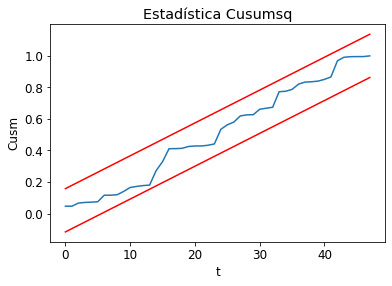

In [203]:
###Gráfico CUSUM_CUADRADO
cumq=(Res_estand**2).cumsum()/sum(Res_estand**2)
co=0.13725####Valor del cuantil aproximado para cusumsq para n/2
LQS=co+np.arange(1,N+1)/N
LQI=-co+np.arange(1,N+1)/N
plt.plot(cumq)
plt.plot(LQS,color='red')
plt.plot(LQI,color='red')
plt.xlabel("t")
plt.ylabel("Cusm")
plt.title('Estadística Cusumsq')

Como se ve en los gráficos los parámetros y la varianza del ruido parecen ser estables en el tiempo.

#### <font color= 199EDC> <b> Predicciones </b> </font>

#### <font color= 199EDC> <b>STL </b> </font>

In [204]:
from statsmodels.tsa.api import STLForecast
from statsmodels.tsa.arima.model import ARIMA

stlf = STLForecast(tpibst[:48], ARIMA, model_kwargs={"order": (2, 1, 0)})

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)


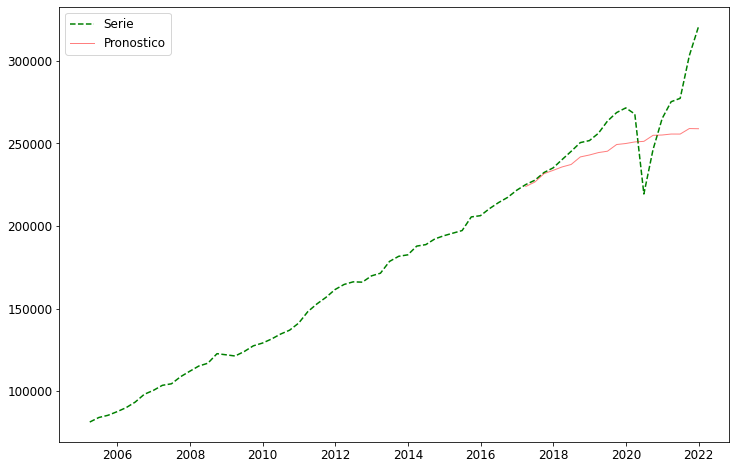

In [205]:
stlf_res = stlf.fit()

forecast = stlf_res.forecast(20)
ppib3=sp.special.inv_boxcox(np.array(forecast),0.48419553841219776)
ppib3=pd.Series(ppib3,index=forecast.index)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1,1,1)
#Serie actual
ax.plot(pibst.astype('float64'), '--', color="green", label='Serie')
# PronÃƒÂ³stico
ax.plot(ppib3, lw=1, color="red", alpha=0.5, label='Pronostico')
ax.legend(loc='upper left')
plt.draw()


#### <font color= 199EDC> <b> Suavizamiento Exponencial </b> </font>

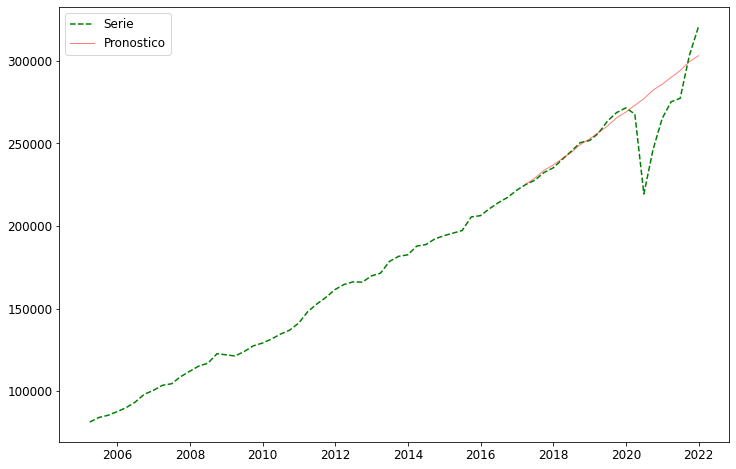

In [206]:
fcast1 = expopib.forecast(20).rename("Pronósticos")

ppib=sp.special.inv_boxcox(np.array(fcast1[0:]),0.48419553841219776)

ppib=pd.Series(ppib,index=fcast1.index)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1,1,1)
#Serie actual
ax.plot(pibst.astype('float64'), '--', color="green", label='Serie')
# PronÃƒÂ³stico
ax.plot(ppib, lw=1, color="red", alpha=0.5, label='Pronostico')
ax.legend(loc='upper left')
plt.draw()

#### <font color= 199EDC> <b> Autoregresivo de orden 1 </b> </font>

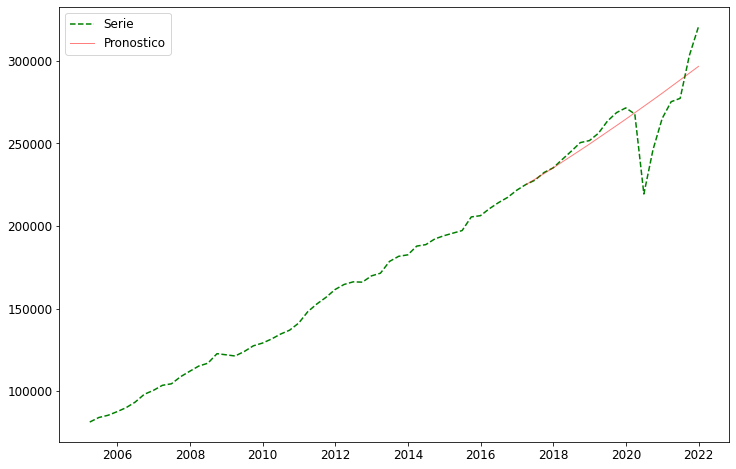

In [207]:
fcast2=resultauto5.forecast(steps=20)

ppib1=[fcast2+trend[48:]]
ppib1=sp.special.inv_boxcox(np.array(ppib1[0]),0.48419553841219776)
ppib1=pd.Series(ppib1,index=fcast2.index)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1,1,1)
#Serie actual
ax.plot(pibst.astype('float64'), '--', color="green", label='Serie')
# PronÃƒÂ³stico
ax.plot(ppib1, lw=1, color="red", alpha=0.5, label='Pronostico')
ax.legend(loc='upper left')
plt.draw()

#### <font color= 199EDC> <b>Error cuadrático medio </b> </font>

In [208]:
pred=(pibst.iloc[48:]-ppib3.values)**2
ECM=sum(pred)/len(pred) 

pred1=(pibst.iloc[48:]-ppib)**2
ECM1=sum(pred1)/len(pred1) 

pred2=(pibst.iloc[48:]-ppib1)**2
ECM2=sum(pred2)/len(pred2) 

print('ECM STL:')
print(ECM)

print('\n ECM Suavizamiento exponencial:')
print(ECM1)

print('\n ECM AR(1):')
print(ECM2)


ECM STL:
482905440.92491114

 ECM Suavizamiento exponencial:
297316796.0068779

 ECM AR(1):
253149075.19335017


Por lo que se comporta mejor el modelo AR(1).

### <font color= F30720> <b> <i> Temperatura diaria registrada en Bogotá entre 2017 y 2021 </i> </b> </font>
Esta serie fue extraída de la base de datos del IDEAM, se tuvieron en cuenta los promedios diarios de las temperaturas en grados centigrados (°C) registradas en Bogotá en las diferentes estaciones meteorológicas que recolectaron información de esos días.
La serie de tiempo cuenta con un total de 1826 registros, de los cuales 13 (0.7%) fueron imputados puesto que no se presentaba la información necesaria. Esta imputación fue realizada a partir del método de vecinos más cercanos (KNN).

#### <font color= 199EDC> <b> Importación e imputación de datos  </b> </font>
Para poder trabajar con esta serie se omitió el día 29 de febrero del 2020.



In [209]:
Temp = pd.read_csv("/content/drive/Shareddrives/Series/Temperatura1.csv", sep=';', header=0, decimal = ',')
Fecha = pd.date_range(start='2017-01-01', end='2021-12-31', freq='D')
Temp['Fecha'] = Fecha
Temp = Temp.set_index('Fecha')
Temp.drop(index='2020-02-29',axis=0,inplace=True)

print(type(Temp))
print(Temp[pd.isnull(Temp.ValorObservado)])
print('En total hay' ,
      str(Temp['ValorObservado'].isnull().sum()) ,
      'valores sin información')

<class 'pandas.core.frame.DataFrame'>
            ValorObservado
Fecha                     
2017-08-12             NaN
2017-12-24             NaN
2019-09-15             NaN
2019-09-16             NaN
2019-09-17             NaN
2020-11-12             NaN
2021-01-05             NaN
2021-01-06             NaN
2021-01-07             NaN
2021-01-08             NaN
2021-08-18             NaN
2021-08-20             NaN
2021-12-05             NaN
En total hay 13 valores sin información


In [210]:
#Imputación de Valores usando el vecino más cercano
imput = KNNImputer(n_neighbors=5, weights="uniform")

# Ajustamos el modelo e imputamos los missing values
imput.fit(Temp[['ValorObservado']])
Temp['ValorObservado'] = imput.transform(Temp[['ValorObservado']]).ravel()
print()
print("Valores pérdidos en ValorObservado: " , 
      str(Temp['ValorObservado'].isnull().sum()))


Valores pérdidos en ValorObservado:  0


In [211]:
Tempst=Temp['ValorObservado']
print(type(Tempst))
print(Tempst.head())

<class 'pandas.core.series.Series'>
Fecha
2017-01-01    11.880556
2017-01-02    12.104167
2017-01-03    12.177778
2017-01-04    12.683908
2017-01-05    12.130208
Name: ValorObservado, dtype: float64


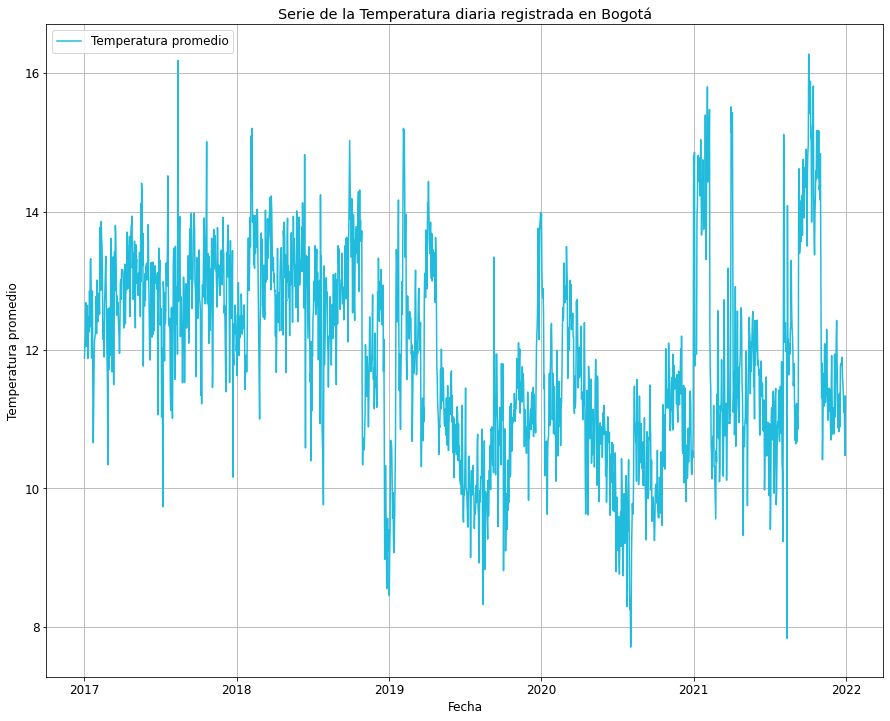

In [212]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(15,12))

ax.plot(Tempst, color='#21BBDD', label='Temperatura promedio')
ax.set_xlabel('Fecha')
ax.set_ylabel('Temperatura promedio')
ax.set_title('Serie de la Temperatura diaria registrada en Bogotá')
ax.grid(True)
ax.legend(loc='upper left')

La serie parece ser estacionaria, no presentar tendencia y tener varianza marginal constante, además presenta un cambio a inicios del 2019 que puede ser debido al fénomeno del niño.

#### <font color= #199EDC> <b> Transformación de Box-Cox para estabilizar la varianza marginal </b> </font>
El valor del $\lambda$ es 

In [213]:
sp.stats.boxcox(Tempst,alpha=0.05)

(array([7.48014587, 7.60764955, 7.64950593, ..., 6.93118459, 6.66531626,
        7.16593687]),
 0.7738702917891288,
 (0.4342384329677832, 1.115028388711996))

El $\lambda$ que se obtuvo es cercano a 1, además en el intervalo se encuentra incluido el 1, por lo que no se considera necesaria una transformación para estabilizar la varianza. 

In [214]:
#Transformación Box-Cox
TTemp = sp.stats.boxcox(Tempst,lmbda=  0.7738702917891288)
TTemp = Temp.assign(TTemp = TTemp) 
TTempst =  TTemp['TTemp'] 
print(type(TTempst))
TTempst.head()

<class 'pandas.core.series.Series'>


Fecha
2017-01-01    7.480146
2017-01-02    7.607650
2017-01-03    7.649506
2017-01-04    7.935773
2017-01-05    7.622464
Name: TTemp, dtype: float64

Para saber si al hacer la transformación se presentan cambios, se realiza nuevamente el análisis, obteniendo que

In [215]:
sp.stats.boxcox(TTempst,alpha=0.05)

(array([6.41610093, 6.54168307, 6.58290519, ..., 5.87522539, 5.61315885,
        6.10655794]),
 0.9924852870337585,
 (0.619577534974478, 1.3674042456735007))

#### <font color= #199EDC> <b> Comparación de la serie original y la serie transformada con Box-Cox  </b> </font>

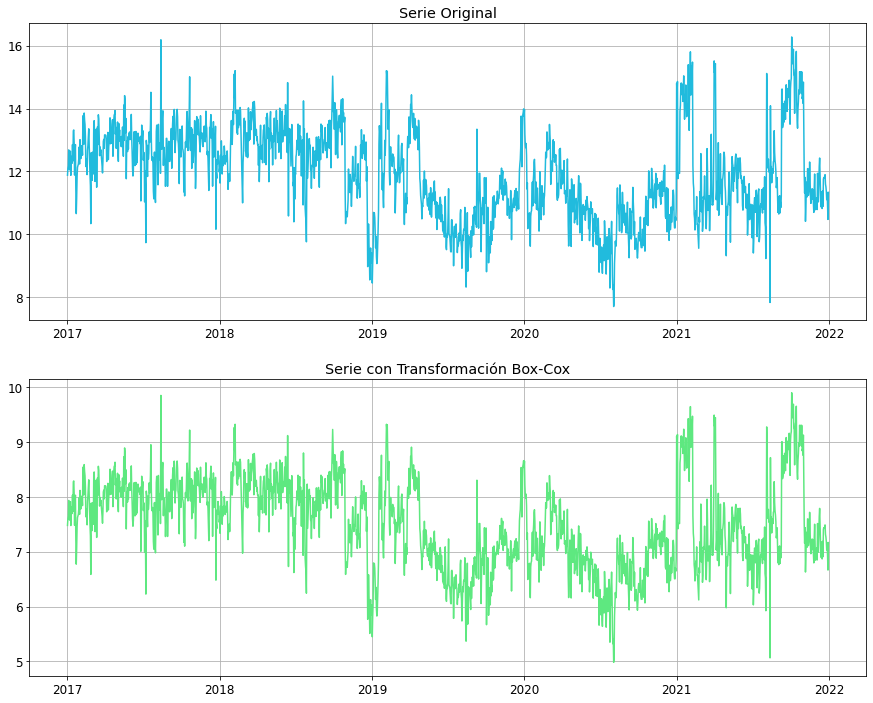

In [216]:
InteractiveShell.ast_node_interactivity = "last"
plt.rc('font', size=12)
fig, axes = plt.subplots(2,1,figsize=(15,12)) 
axes[0].plot(Temp['ValorObservado'], color='#21BBDD', label='Temperatura promedio')
axes[0].title.set_text('Serie Original')
axes[0].grid(True)
axes[1].plot(TTempst, color='#5EE880')
axes[1].title.set_text('Serie con Transformación Box-Cox')
axes[1].grid(True)
plt.show()

Aunque se observa mejoría en el $\lambda$, en el gráfico se puede evidenciar que la única diferencia aparente es un pequeño cambio en cuanto a la escala de medición.\
Por lo tanto, el análisis se realizará con respecto a la serie sin transformar.

#### <font color= #199EDC> <b> Datos atípicos  </b> </font>



Valores atípicos
Fecha
2017-08-13    16.184615
2020-08-03     7.705239
2021-10-04    16.274757
Name: ValorObservado, dtype: float64


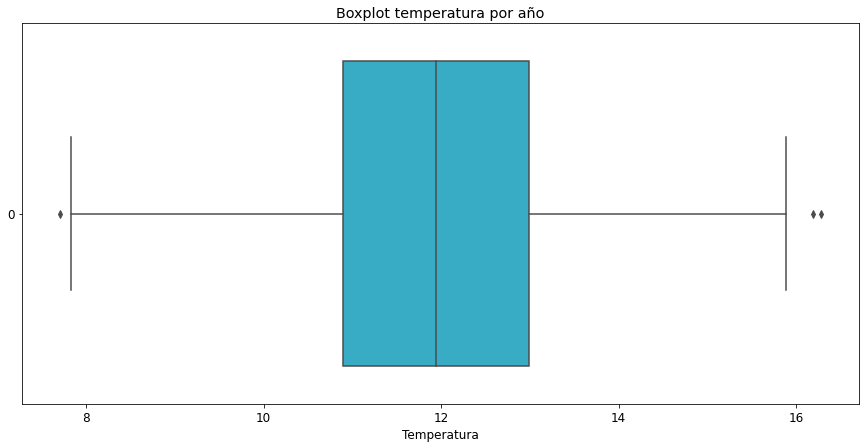

In [217]:
plt.figure(figsize=(15, 7))
g = sns.boxplot(data=Tempst,orient="h", color='#21BBDD')
#h = sns.boxplot(data=Tempst,orient="h")
g.set_title('Boxplot temperatura por año')
g.set_xlabel('Temperatura')
Tempst.describe()
IQR1 = 12.984528-10.899518
upper1 = 12.984528+1.5*IQR1
lower1 = 10.899518-1.5*IQR1
print()
print()
print('Valores atípicos')
print(Tempst[(Tempst<lower1)+(Tempst>upper1)])


Se presentan 3 datos atípicos, en las siguientes fechas con su respectivo valor de temperatura: 

*   2017-08-13  &nbsp;&nbsp;&nbsp;&nbsp;    16.184615
*   2020-08-03  &nbsp;&nbsp;&nbsp;&nbsp;    7.705239
*   2021-10-04  &nbsp;&nbsp;&nbsp;&nbsp;   16.274757  



#### <font color= 199EDC> <b> Análisis de tendencia usando Promedios Moviles </b> </font>

Primero se debe verificar si la serie presenta o no tendencia. Para esto, se implementa la descomposición de tendencia estacional (STL) utilizando el método LOESS. El cual descompone la serie en la suma de la componente estacional, de tendencia y de residuo.
$$ X_t = m_t + S_t + \mathcal{E}_t$$

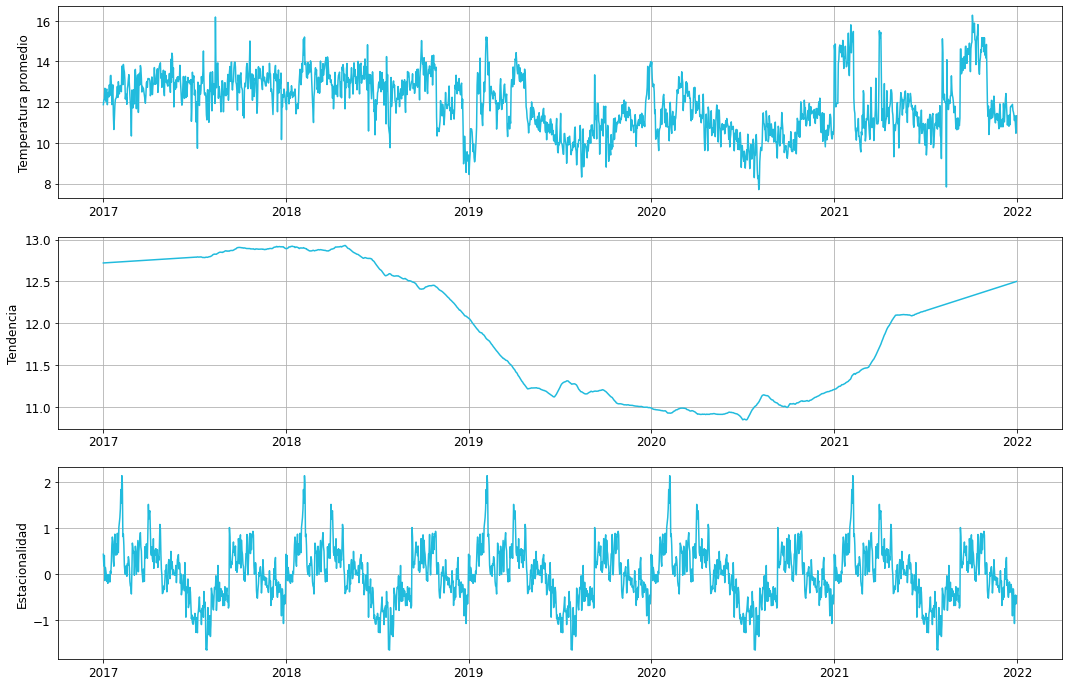

In [218]:
####Descomposición serie transformada usando promedios moviles
result = seasonal_decompose(Tempst, model='additive',
                            extrapolate_trend=6, period=365)

InteractiveShell.ast_node_interactivity = "last"
plt.rc('font', size=12)
fig, axes = plt.subplots(3,1,figsize=(18,12)) 
axes[0].plot(Tempst, color='#21BBDD')
axes[0].set_ylabel('Temperatura promedio')
axes[0].grid(True)
axes[1].plot(result.trend, color='#21BBDD')
axes[1].set_ylabel('Tendencia')
axes[1].grid(True)
axes[2].plot(result.seasonal, color='#21BBDD')
axes[2].set_ylabel('Estacionalidad')
axes[2].grid(True)
plt.show()

Según el gráfico la serie parece presentar tendencia y una componente estacional, describiendo un ciclo cada año.

#### <font color= 199EDC> <b> Serie sin tendencia</b> </font>

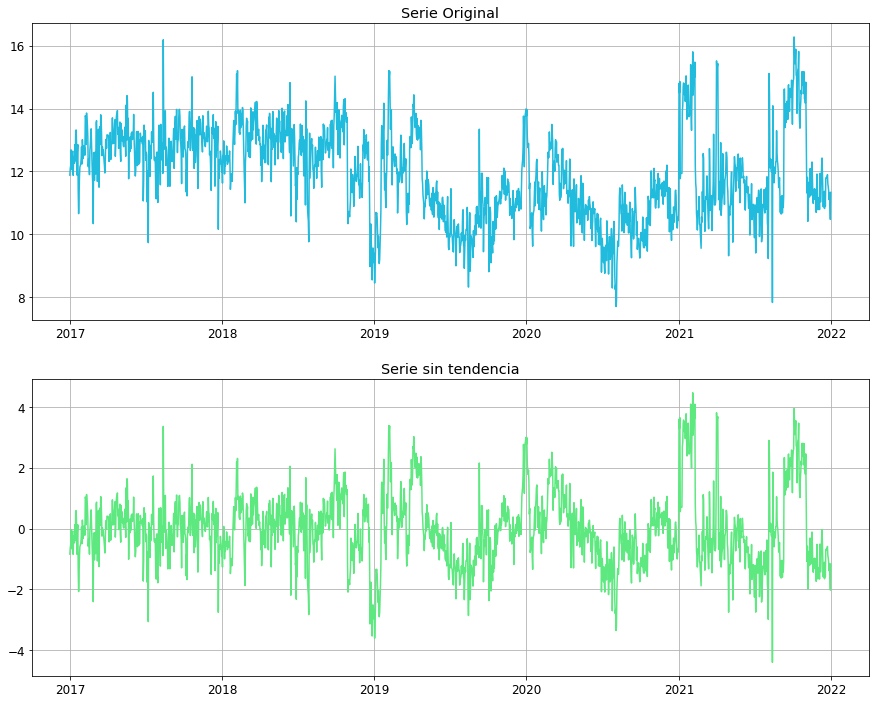

In [219]:
detrended1 = [Tempst.values[i]-result.trend[i] for i in range(0, len(Tempst))]
nTempst=pd.Series(detrended1,index=Tempst.index)

InteractiveShell.ast_node_interactivity = "last"
plt.rc('font', size=12)
fig, axes = plt.subplots(2,1,figsize=(15,12)) 
axes[0].plot(Temp['ValorObservado'], color='#21BBDD', label='Temperatura promedio')
axes[0].title.set_text('Serie Original')
axes[0].grid(True)
axes[1].plot(nTempst, color='#5EE880')
axes[1].title.set_text('Serie sin tendencia')
axes[1].grid(True)

#### <font color= 199EDC> <b> Ciclos y estacionalidades</b> </font>
Para poder visualizar si hay presencia de ciclos o estacionalidades, se realizaron diagramas de caja de los meses y días presentados.

In [220]:
f = {'ValorObservado': nTempst.values, 'fecha': nTempst.index,'año':nTempst.index.year,
     'mes':nTempst.index.month_name(), 'dia':nTempst.index.day}
df_temp = pd.DataFrame(data=f)

Text(0, 0.5, 'Valor de temperatura')

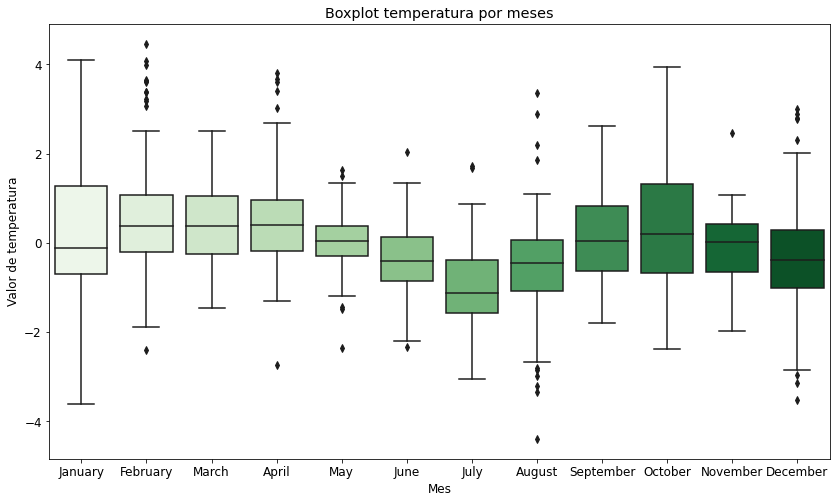

In [221]:
plt.figure(figsize=(14, 8))
g = sns.boxplot(data=df_temp, y='ValorObservado', x='mes', palette='Greens')
g.set_title('Boxplot temperatura por meses')
g.set_xlabel('Mes')
g.set_ylabel('Valor de temperatura')

Se puede observar un ciclo anual, debido a que los valores medios de la temperatura son parecidos entre si pero distintos a los demás.

Text(0, 0.5, 'Valor de temperatura')

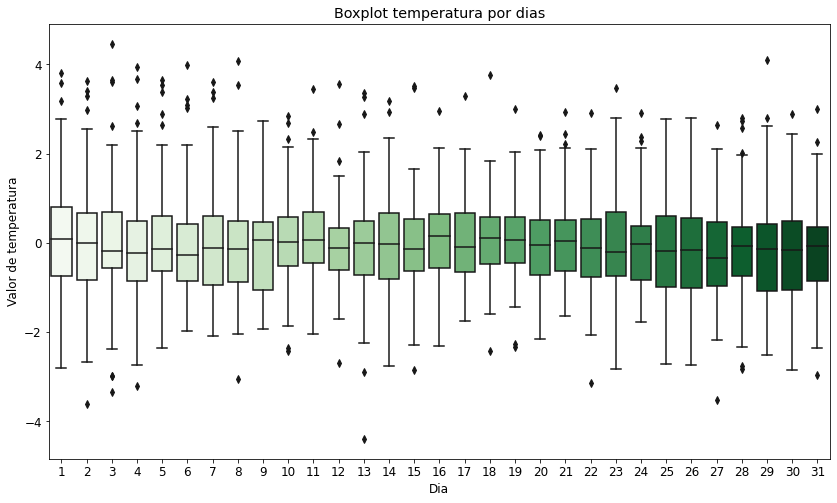

In [222]:
plt.figure(figsize=(14, 8))
g = sns.boxplot(data=df_temp, y='ValorObservado', x='dia', palette='Greens')
g.set_title('Boxplot temperatura por dias')
g.set_xlabel('Dia')
g.set_ylabel('Valor de temperatura')

Como se esperaba no hay presencia de ciclo mensual.

#### <font color= 199EDC> <b> Periodograma </b> </font>
Por último, para verificar que si se presenta un ciclo anual, se realiza un periodograma.

Text(0.5, 1.0, 'Periodograma')

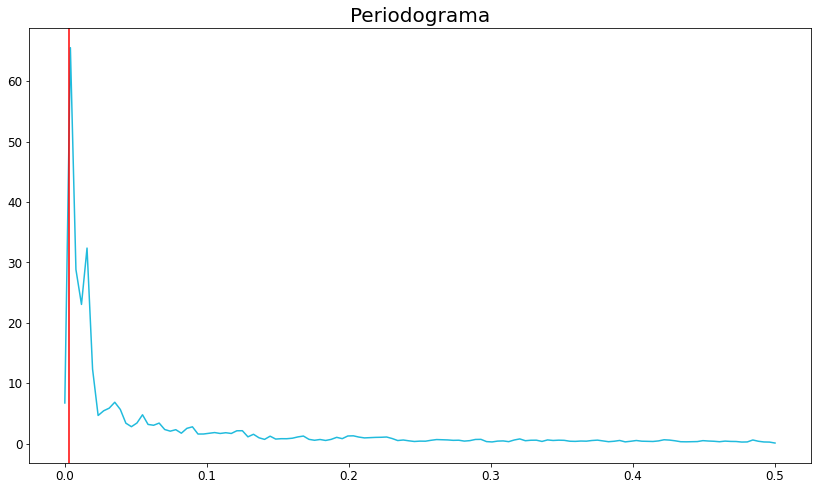

In [223]:
#### Periodograma

f, Pxx_den=sp.signal.periodogram(nTempst) 
print()
max_index_value = np.argmax(Pxx_den, axis=0)
frecuencia_max=f[max_index_value]
plt.figure(figsize=(14, 8))
f_welch, Pxx_den_welch=sp.signal.welch(nTempst)
plt.plot(f_welch, Pxx_den_welch, color='#21BBDD') 
plt.axvline(x=1/365,color='red')
plt.title('Periodograma', fontdict={'fontsize': 20})

Como se esperaba, la serie presenta un ciclo anual, el cual se refleja en el primer y más grande pico del periodograma correspondiente a $\dfrac{1}{365}$.

#### <font color= 199EDC> <b> Raices unitarias </b> </font>

In [224]:
adfstat, pvalue, critvalues, resstore=adfuller(Tempst,regression="nc",maxlag=9,store=True,regresults=True)
print(resstore.resols.summary())

resultadoadf=adfuller(Tempst,regression="nc", maxlag=9)
print('ADF Statistic: %f' % resultadoadf[0])
print('P-value: %f' % resultadoadf[1])
for key, value in resultadoadf[4].items():
    print('\t%s: %.3f' % (key, value))

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.125
Model:                            OLS   Adj. R-squared (uncentered):              0.121
Method:                 Least Squares   F-statistic:                              28.68
Date:                Thu, 27 Oct 2022   Prob (F-statistic):                    5.46e-47
Time:                        00:27:54   Log-Likelihood:                         -1869.5
No. Observations:                1816   AIC:                                      3757.
Df Residuals:                    1807   BIC:                                      3807.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:824: FutureWarning: trend 'nc' has been renamed to 'n' after 0.14 is released. Use 'n' now to avoid this warning.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:824: FutureWarning: trend 'nc' has been renamed to 'n' after 0.14 is released. Use 'n' now to avoid this warning.
  FutureWarning,


Al obtener un p-valor de 0.457838, se tiene que la serie presenta raices unitarias. Por lo que se decide diferenciarla.

#### <font color= 199EDC> <b> Serie Diferenciada</b> </font>


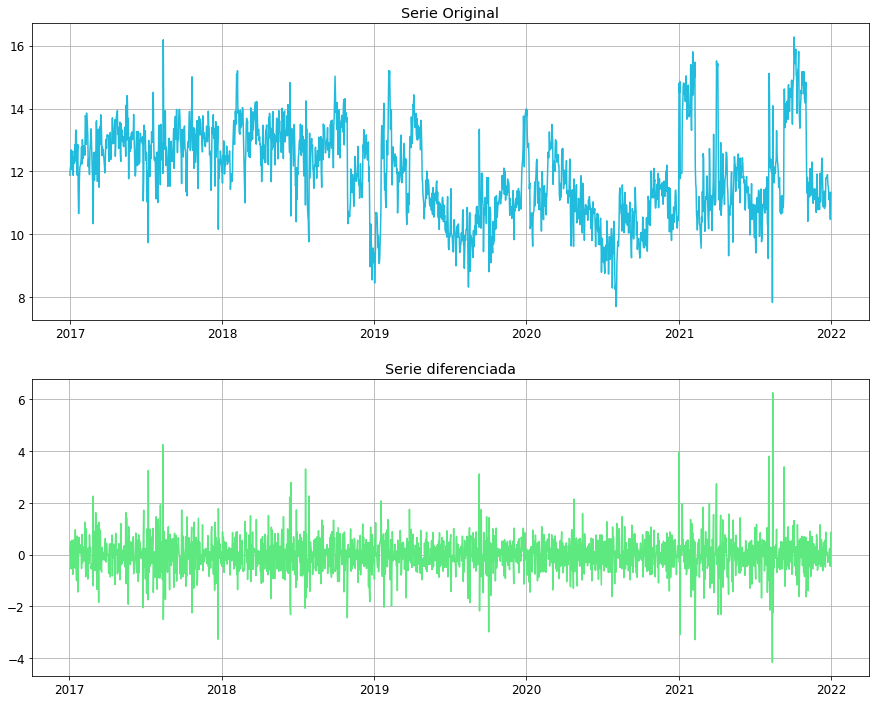

In [225]:
dtempst=Tempst.diff(periods=1)

InteractiveShell.ast_node_interactivity = "last"
plt.rc('font', size=12)
fig, axes = plt.subplots(2,1,figsize=(15,12)) 
axes[0].plot(Temp['ValorObservado'], color='#21BBDD', label='Temperatura promedio')
axes[0].title.set_text('Serie Original')
axes[0].grid(True)
axes[1].plot(dtempst, color='#5EE880')
axes[1].title.set_text('Serie diferenciada')
axes[1].grid(True)
plt.show()

La serie parece ser estacionaria. Pero de igual manera se puede verificar.

In [226]:
adfstat, pvalue, critvalues, resstore=adfuller(dtempst.dropna(),regression="nc",maxlag=8,store=True,regresults=True)
print(resstore.resols.summary())

resultadoadf=adfuller(dtempst.dropna(),regression="nc", maxlag=8)
print('ADF Statistic: %f' % resultadoadf[0])
print('P-value: %f' % resultadoadf[1])
for key, value in resultadoadf[4].items():
    print('\t%s: %.3f' % (key, value))

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.648
Model:                            OLS   Adj. R-squared (uncentered):              0.646
Method:                 Least Squares   F-statistic:                              415.9
Date:                Thu, 27 Oct 2022   Prob (F-statistic):                        0.00
Time:                        00:27:54   Log-Likelihood:                         -1869.7
No. Observations:                1816   AIC:                                      3755.
Df Residuals:                    1808   BIC:                                      3799.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:824: FutureWarning: trend 'nc' has been renamed to 'n' after 0.14 is released. Use 'n' now to avoid this warning.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:824: FutureWarning: trend 'nc' has been renamed to 'n' after 0.14 is released. Use 'n' now to avoid this warning.
  FutureWarning,


La serie ya no presenta más raices unitarias, por lo que no se debe volver a diferenciar.

#### <font color= 199EDC> <b> Componente Estacional  </b> </font>

In [227]:
pm.arima.nsdiffs(dtempst.dropna(), 365 , max_D=2, test='ocsb')

0

#### <font color =199EDC> <b> Gráficos de Autocorrelación </b> </font>
Se realiza un gráfico de autocorrelaciones simples y uno de autocorrelaciones parciales para la serie de temperatura. Esto permitirá observar cuantos retardos son significativos.

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


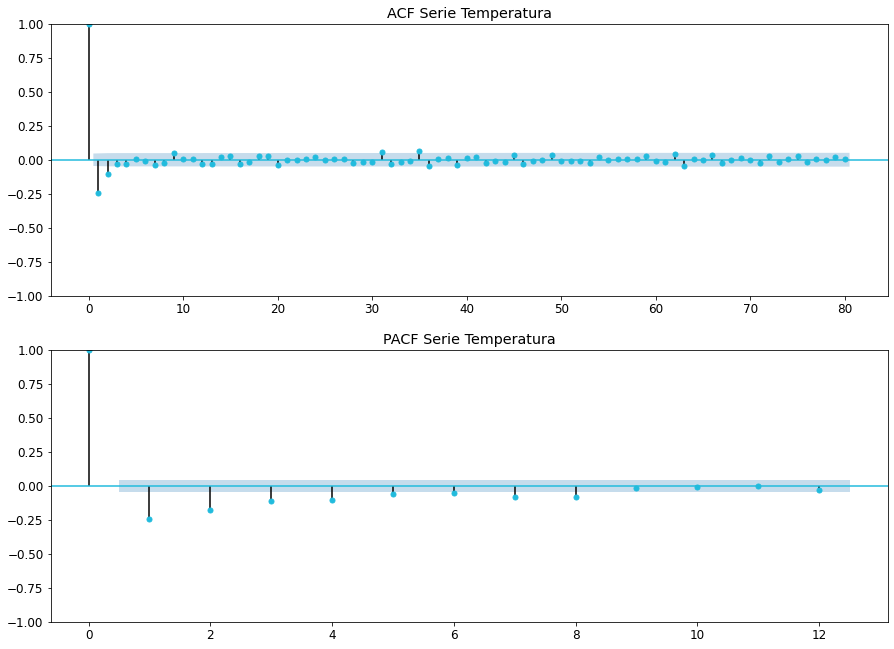

In [228]:
InteractiveShell.ast_node_interactivity = "last"
fig, axes = plt.subplots(2,1,figsize=(15,11)) 
a=plot_acf(dtempst.dropna(),adjusted=False,lags=80,title='ACF Serie Temperatura',ax=axes[0], color = '#21BBDD' )
c=plot_pacf(dtempst.dropna(),lags=12,title='PACF Serie Temperatura',ax=axes[1], color ='#21BBDD')
plt.show()
InteractiveShell.ast_node_interactivity = "all"

Como se puede observar en el gráfico, las autocorrelaciones simples disminuyen a medida que aumentan los retardos, teniendo que estas se vuelven casi cero en el retardo 3. De igual manera, se puede evidenciar que no se presentan periodicidades en las autocorrelaciones.  \
En cuanto a las autocorrelaciones parciales, se obtuvo que el retardo que puede llegar a ser relevante es el retardo 9, debido a que es el primer valor que se encuentra más cercano a cero.

#### <font color= 199EDC> <b> Gráfico de Retardos </b> </font>
Como se dijo anteriormente, el retardo que puede llegar a presentar cambios en la serie es el 9, por lo que se utilizó uno más que este para la realización del siguiente gráfico.

<Figure size 1296x720 with 0 Axes>

Text(0.5, 1.0, 't vs t-1')

Text(0.5, 1.0, 't vs t-2')

Text(0.5, 1.0, 't vs t-3')

Text(0.5, 1.0, 't vs t-4')

Text(0.5, 1.0, 't vs t-5')

Text(0.5, 1.0, 't vs t-6')

Text(0.5, 1.0, 't vs t-7')

Text(0.5, 1.0, 't vs t-8')

Text(0.5, 1.0, 't vs t-9')

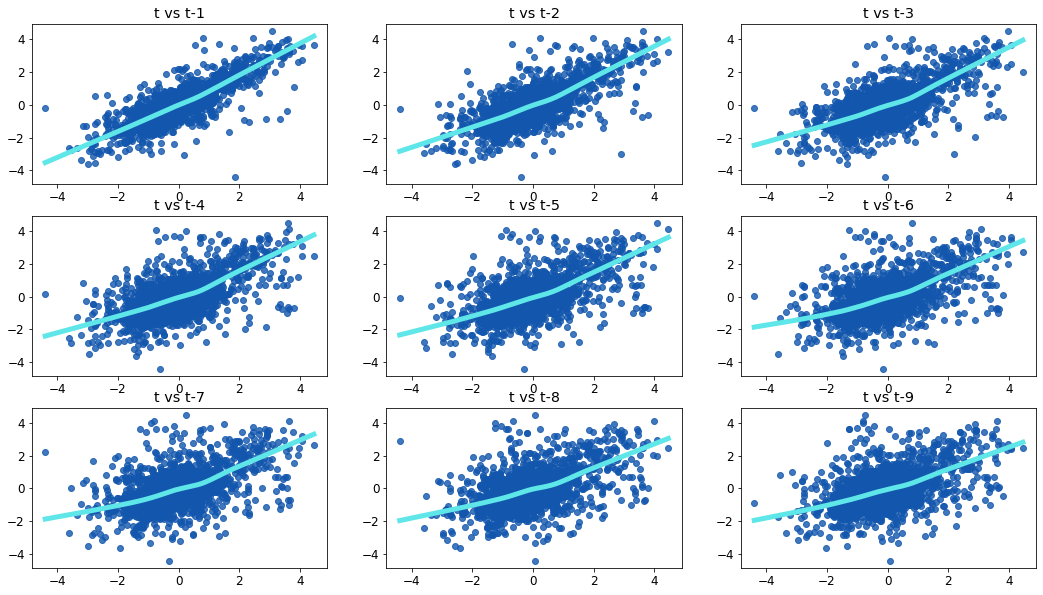

In [229]:
values = pd.DataFrame(nTempst.values)
lags = 9
columns = [values]
for i in range(1,(lags + 1)):
	columns.append(values.shift(i))
dataframe = pd.concat(columns, axis=1)
columns = ['t']
for i in range(1,(lags + 1)):
	columns.append('t-' + str(i))
dataframe.columns = columns

plt.figure(2,(18, 10))
for i in range(1,(lags + 1)):
	ax = plt.subplot(3,3,i)
	ax.set_title('t vs t-' + str(i))
	sns.regplot(x=dataframe['t'].values, y=dataframe['t-'+str(i)].values,color="#1256AD",lowess=True, 
            line_kws={"color":"#5EE6E8", "linewidth":5})
plt.show()

Se puede observar que existe una correlación positiva entre los retardos y el cambio de temperatura promedio. De igual manera se tiene que posiblemente varias correlaciones sean lineales, como se evidencia en el caso de los primeros 9 retardos. 

#### <font color= 199EDC> <b> Ajustes del modelo </b> </font>
Para el ajuste de los modelos se usan 1278 datos como conjunto de entrenamiento y 547 como conjunto de prueba, los cuales corresponden al 70% y 30% del total de los datos

#### <font color= 199EDC> <b> Suavizamiento Exponencial </b> </font>



/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Text(0, 0.5, 'Temperatura')

Text(0, 0.5, 'Nivel')

Text(0, 0.5, 'Tendencia')

Text(0, 0.5, 'Estacionalidad')

Text(0, 0.5, 'Residuos')

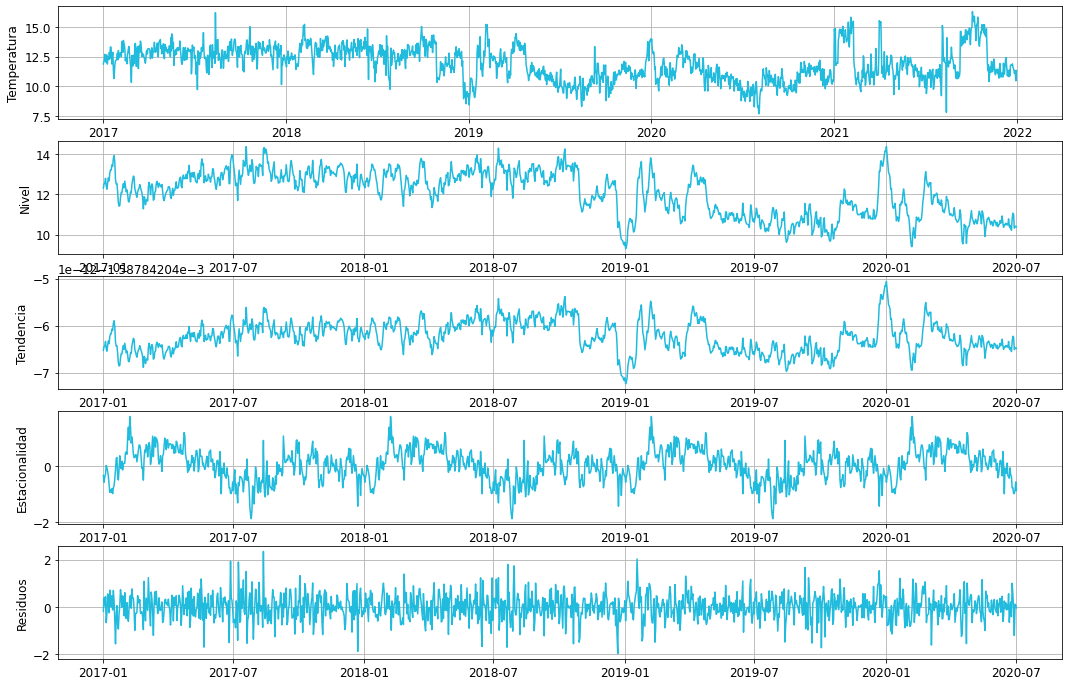

In [230]:
####Holt-Winters
expotemp = ExponentialSmoothing(Tempst[:1278], seasonal_periods=365, trend='add', seasonal='add',initialization_method="estimated",use_boxcox=False).fit()
InteractiveShell.ast_node_interactivity = "last"
plt.rc('font', size=12)
fig, axes = plt.subplots(5,1,figsize=(18,12)) 
axes[0].plot(Tempst, color='#21BBDD')
axes[0].set_ylabel('Temperatura')
axes[0].grid(True)
axes[1].plot(expotemp.level, color='#21BBDD')
axes[1].set_ylabel('Nivel')
axes[1].grid(True)
axes[2].plot(expotemp.trend, color='#21BBDD')
axes[2].set_ylabel('Tendencia')
axes[2].grid(True)
axes[3].plot(expotemp.season, color='#21BBDD')
axes[3].set_ylabel('Estacionalidad')
axes[3].grid(True)
axes[4].plot(expotemp.resid, color='#21BBDD')
axes[4].set_ylabel('Residuos')
axes[4].grid(True)
plt.show()

Los parámetros estimados por suavizamiento exponencial son,

In [231]:
expotemp.params_formatted

,name,param,optimized
smoothing_level,alpha,5.576964e-01,True
smoothing_trend,beta,3.861061e-13,True
smoothing_seasonal,gamma,2.863486e-10,True
initial_level,l.0,1.241874e+01,True
initial_trend,b.0,-1.587842e-03,True
...,...,...,...
initial_seasons.360,s.360,-1.060540e+00,True
initial_seasons.361,s.361,-3.788051e-01,True
initial_seasons.362,s.362,-8.981883e-02,True
initial_seasons.363,s.363,-2.224484e-01,True


#### <font color= 199EDC> <b> Análisis de residuales </b> </font>
Los residuales del modelo de suavizamiento exponencial parecen ser estacionarios, no presentar tendencia ni ciclos o estacionalidades. Ahora veamos como se comportan las ACF y PACF de los residuales

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


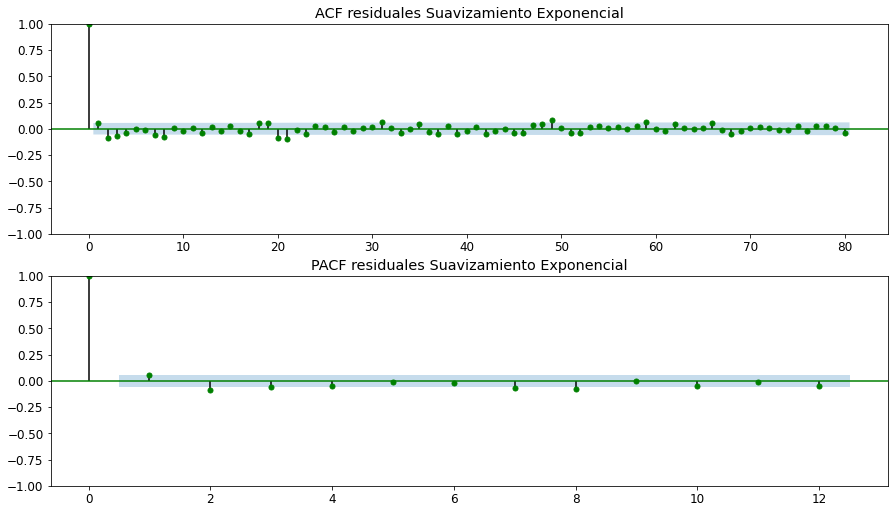

In [232]:
#####Análisis de Residuales######
residualesexp1 = expotemp.resid

InteractiveShell.ast_node_interactivity = "last"
fig, axes = plt.subplots(2,1,figsize=(15,8.5))

a = plot_acf(residualesexp1,adjusted=False,lags=80,title='ACF residuales Suavizamiento Exponencial',ax=axes[0], color='green')
b = plot_pacf(residualesexp1, lags=12,title='PACF residuales Suavizamiento Exponencial',ax=axes[1], color='green')

Como se observa en los gráficos de ACF algunas correlación queda sin ser explicadas, de igual manera sucede en el PACF.

#### <font color= 199EDC> <b> STL </b> </font>

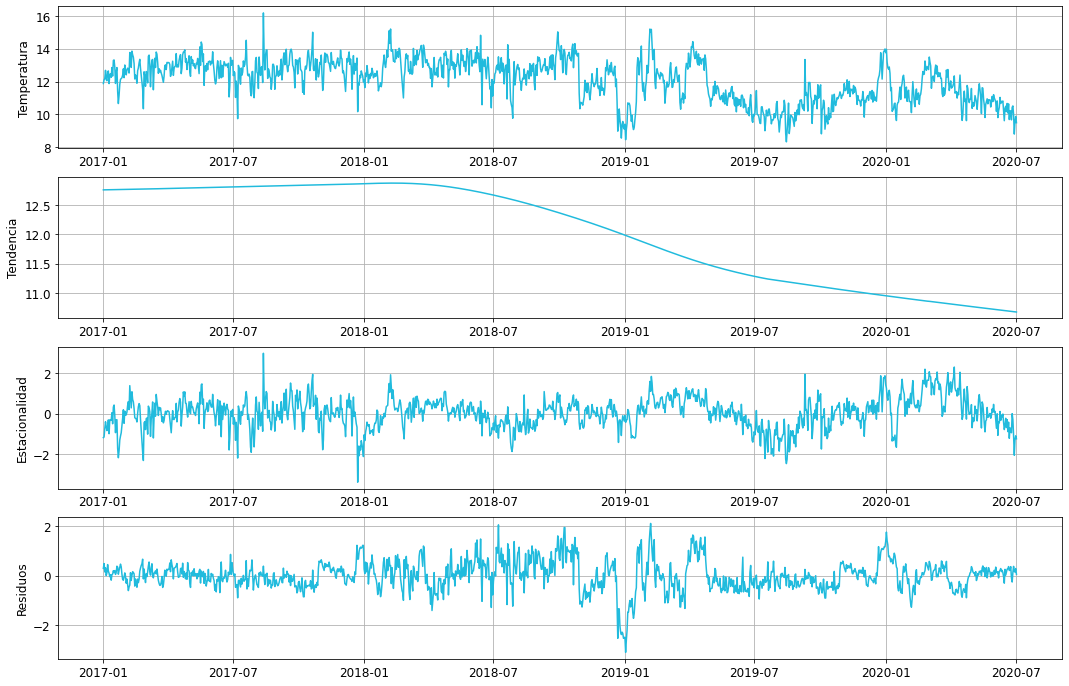

In [233]:
result1 = STL(Tempst[:1278],period=365)
stl1=result1.fit()
InteractiveShell.ast_node_interactivity = "last"
plt.rc('font', size=12)
fig, axes = plt.subplots(4,1,figsize=(18,12)) 
axes[0].plot(Tempst[:1278], color='#21BBDD')
axes[0].set_ylabel('Temperatura')
axes[0].grid(True)
axes[1].plot(stl1.trend, color='#21BBDD')
axes[1].set_ylabel('Tendencia')
axes[1].grid(True)
axes[2].plot(stl1.seasonal, color='#21BBDD')
axes[2].set_ylabel('Estacionalidad')
axes[2].grid(True)
axes[3].plot(stl1.resid, color='#21BBDD')
axes[3].set_ylabel('Residuos')
axes[3].grid(True)
plt.show()

#### <font color= 199EDC> <b> Análisis de residuales </b> </font>

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


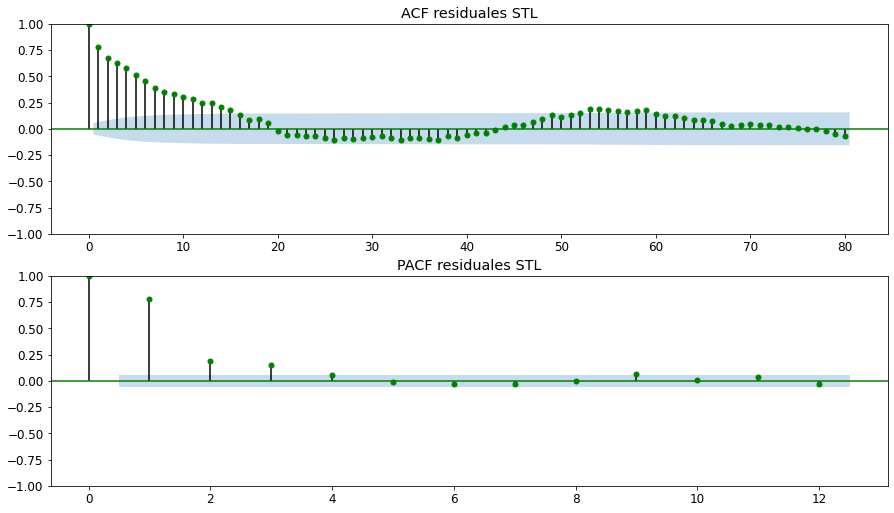

In [234]:
#####Análisis de Residuales######
residuales2 = stl1.resid

InteractiveShell.ast_node_interactivity = "last"
fig, axes = plt.subplots(2,1,figsize=(15,8.5))

a = plot_acf(residuales2,adjusted=False,lags=80,title='ACF residuales STL',ax=axes[0], color='green')
b = plot_pacf(residuales2, lags=12,title='PACF residuales STL',ax=axes[1], color='green')




Como se observa en los gráficos de ACF muchas correlación queda sin ser explicadas, algo similar sucede en el PACF solo que se salen menos.

#### <font color= 199EDC> <b> Modelo ARIMA (p,d,q) </b> </font>

Como se habia mencionado anteriormente al observar las autocorrelaciones simples y parciales luego de diferenciar, se podrían ajustar un modelo ARIMA con ordenes máximos dados por p = 8, q = 9 y d=1.  

In [235]:
###Estimación de de los parámetros de la serie simulada
###AR
ARI5= sm.tsa.statespace.sarimax.SARIMAX(dtempst.dropna()[:1278], trend='c', order=[8,1,0])  
ARI51= sm.tsa.statespace.sarimax.SARIMAX(dtempst.dropna()[:1278], trend='n', order=[8,1,0])  

###Modelo MA
MAI1= sm.tsa.statespace.sarimax.SARIMAX(dtempst.dropna()[:1278], trend='c', order=[0,1,9])
MAI11= sm.tsa.statespace.sarimax.SARIMAX(dtempst.dropna()[:1278], trend='n', order=[0,1,9])

presultpromi = MAI1.fit()
presultpromi1 = MAI11.fit()
#order=[p,d,q]
####Si tiene parte estacional agregar seasonal_order=(0,0,0,12)
resultautoi = ARI5.fit()
resultautoi1 = ARI51.fit()
presultpromi = MAI1.fit()
presultpromi1 = MAI11.fit()
print(resultautoi.summary(),resultautoi1.summary(),presultpromi.summary(),presultpromi1.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr

                               SARIMAX Results                                
Dep. Variable:         ValorObservado   No. Observations:                 1278
Model:               SARIMAX(8, 1, 0)   Log Likelihood               -1352.245
Date:                Thu, 27 Oct 2022   AIC                           2724.489
Time:                        00:28:47   BIC                           2776.012
Sample:                             0   HQIC                          2743.838
                               - 1278                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0010      0.020     -0.049      0.961      -0.040       0.038
ar.L1         -1.1801      0.022    -53.255      0.000      -1.223      -1.137
ar.L2         -1.2113      0.040    -30.566      0.0

Se obtuvo que ajusta mejor AR(8), MA(9)

### Análisis de residuales


[[6.41115165e-01 4.96374002e-06]]
[[3.59163169e+02 1.02025542e-78 7.19082165e-02 5.59411774e+00]]


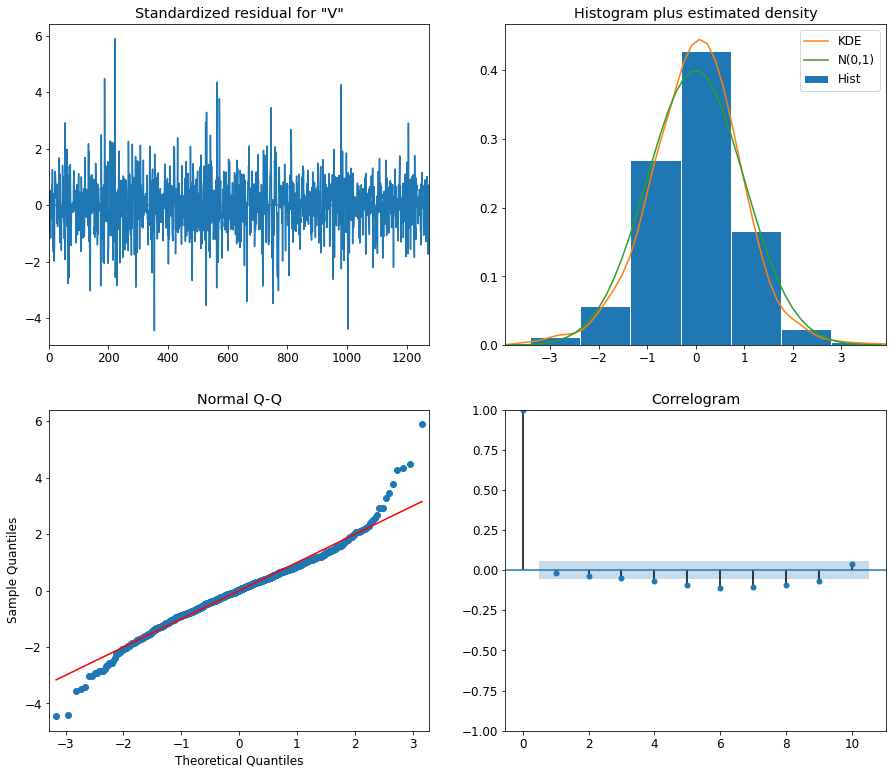

In [236]:
#####Análisis de Residuales######
#AR(8)
results_final3 = ARI51.fit()
residuales2=results_final3.resid
results_final3.plot_diagnostics(figsize=(15,13))
## Hipótesis nula de no heterocedasticidad
print(results_final3.test_heteroskedasticity(method='breakvar')) #[Est. de prueba, p-valor]
## Hipótesis nula de normalidad
print(results_final3.test_normality(method='jarquebera'))
#1. Estadística de prueba
#2. El p valor
#3. Sesgo estimado de los datos
#4. Curtosis estimada
## Hipótesis nula indica que no se presenta correlación serial

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


[[7.16288259e-01 5.95811613e-04]]
[[ 4.44112967e+02  3.64833399e-97 -3.19544134e-03  5.88905518e+00]]


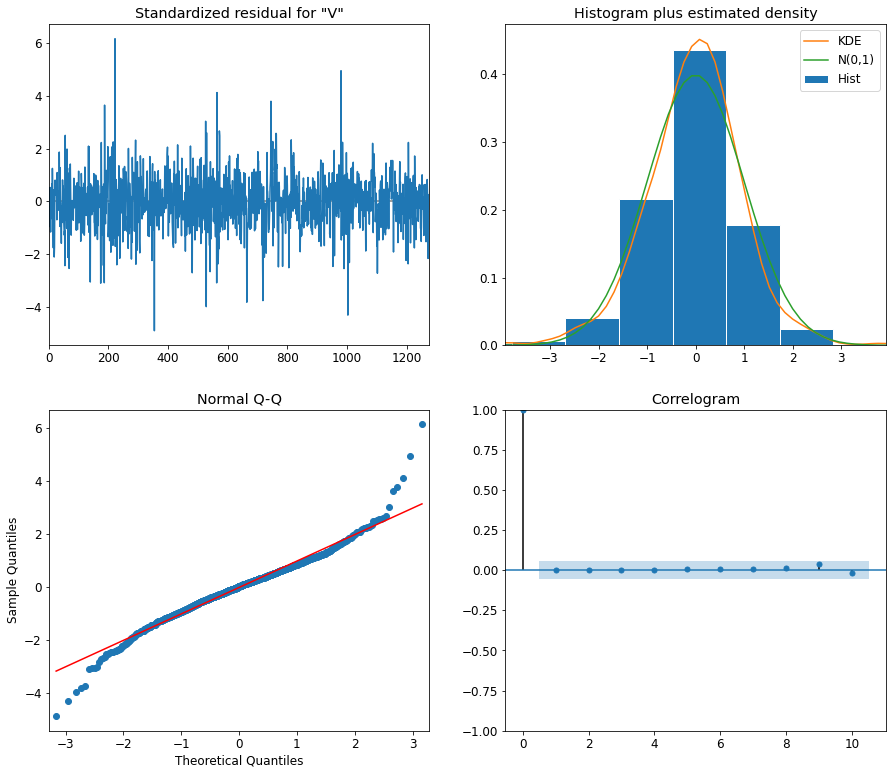

In [237]:
#####Análisis de Residuales######
#MA(9)
results_final4 = MAI11.fit()
residuales3=results_final4.resid
results_final4.plot_diagnostics(figsize=(15,13))
## Hipótesis nula de no heterocedasticidad
print(results_final4.test_heteroskedasticity(method='breakvar')) #[Est. de prueba, p-valor]
## Hipótesis nula de normalidad
print(results_final4.test_normality(method='jarquebera'))
#1. Estadística de prueba
#2. El p valor
#3. Sesgo estimado de los datos
#4. Curtosis estimada
## Hipótesis nula indica que no se presenta correlación serial

### ARIMA

In [238]:
###Estimación de de los parámetros de la serie simulada
ARIMA= sm.tsa.statespace.sarimax.SARIMAX(dtempst.dropna()[:1278], trend='c', order=[8,1,9])
ARIMA1= sm.tsa.statespace.sarimax.SARIMAX(dtempst.dropna()[:1278], trend='n', order=[8,1,9])

presultarima = ARIMA.fit()
presultarima1 = ARIMA1.fit()
print(presultarima.summary(),presultarima1.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr

                               SARIMAX Results                                
Dep. Variable:         ValorObservado   No. Observations:                 1278
Model:               SARIMAX(8, 1, 9)   Log Likelihood               -1237.644
Date:                Thu, 27 Oct 2022   AIC                           2513.287
Time:                        00:29:24   BIC                           2611.181
Sample:                             0   HQIC                          2550.050
                               - 1278                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0001      0.001     -0.198      0.843      -0.001       0.001
ar.L1         -1.8364      0.363     -5.061      0.000      -2.548      -1.125
ar.L2         -2.4545      0.558     -4.397      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


[[7.08477955e-01 3.91440688e-04]]
[[ 4.21049456e+02  3.71768257e-92 -2.63082057e-02  5.81255319e+00]]


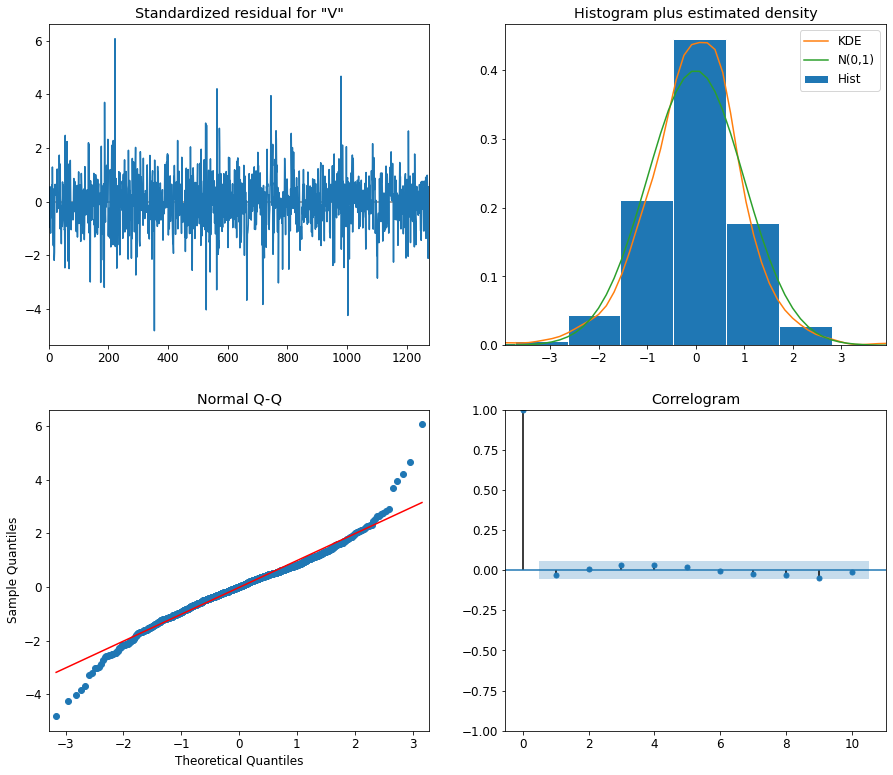

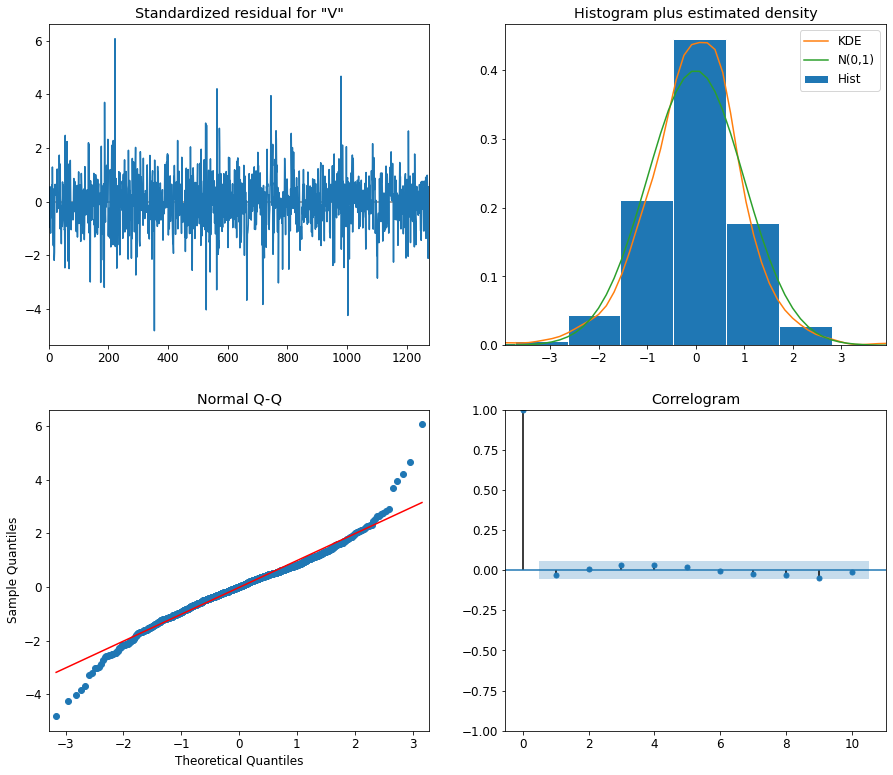

In [239]:
#####Análisis de Residuales######
#ARIMA(8,1,9)
results_final5 = ARIMA1.fit()
residuales4=results_final5.resid

## Hipótesis nula de no heterocedasticidad
print(results_final5.test_heteroskedasticity(method='breakvar')) #[Est. de prueba, p-valor]
## Hipótesis nula de normalidad
print(results_final5.test_normality(method='jarquebera'))
#1. Estadística de prueba
#2. El p valor
#3. Sesgo estimado de los datos
#4. Curtosis estimada
## Hipótesis nula indica que no se presenta correlación serial
results_final5.plot_diagnostics(figsize=(15,13))
#plt.show()

In [240]:
auto1 = pm.auto_arima(dtempst.dropna()[:1278], error_action='ignore',max_p=8,d=1 ,max_q=9,max_order=17,seasonal=False, m=12,information_criterion='bic')
auto1.summary()

/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1278
Model:               SARIMAX(1, 1, 2)   Log Likelihood               -1248.749
Date:                Thu, 27 Oct 2022   AIC                           2507.498
Time:                        00:30:00   BIC                           2533.259
Sample:                             0   HQIC                          2517.172
                               - 1278                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -5.272e-05   5.93e-05     -0.889      0.374      -0.000    6.35e-05
ar.L1          0.4554      0.038     11.880      0.000       0.380       0.531
ma.L1         -1.8173      0.025    -71.632      0.000      -1.867      -1.768
ma.L2          0.8202      0.026     31.833      0.000       0.770       0.871
sigma2         0.3977      0.010     39.036      0.000       0.378       0.418
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               471.45
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               0.70   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr

                               SARIMAX Results                                
Dep. Variable:         ValorObservado   No. Observations:                 1278
Model:               SARIMAX(1, 1, 2)   Log Likelihood               -1248.749
Date:                Thu, 27 Oct 2022   AIC                           2507.498
Time:                        00:30:04   BIC                           2533.259
Sample:                             0   HQIC                          2517.172
                               - 1278                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -5.272e-05   5.93e-05     -0.889      0.374      -0.000    6.35e-05
ar.L1          0.4554      0.038     11.880      0.000       0.380       0.531
ma.L1         -1.8173      0.025    -71.632      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


[[6.99104635e-01 2.31314966e-04]]
[[ 4.73425189e+002  1.57407864e-103 -3.04349774e-002  5.98225935e+000]]


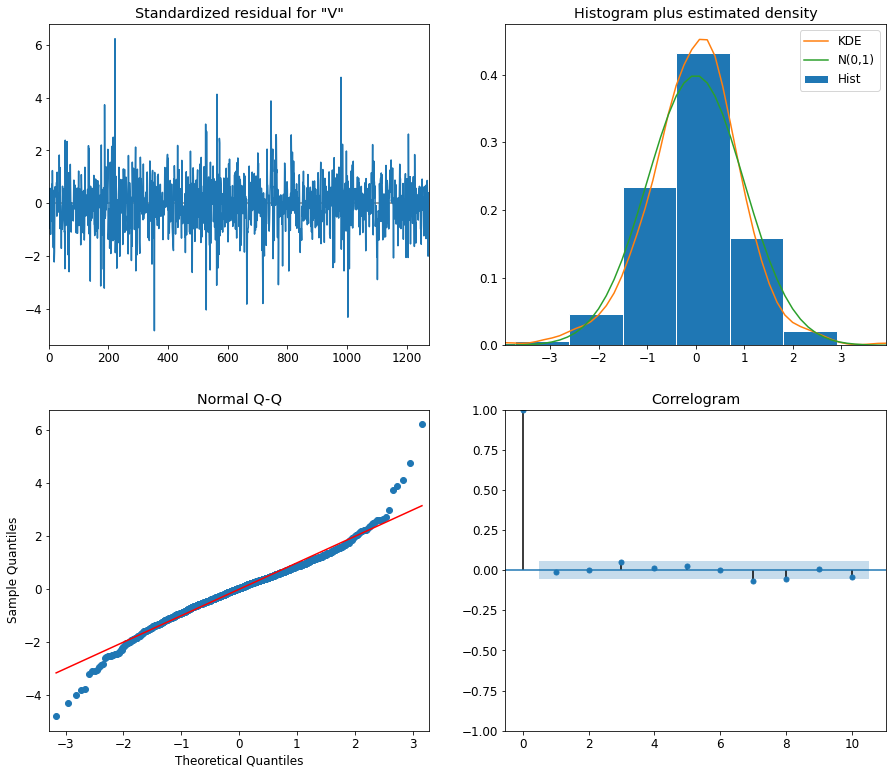

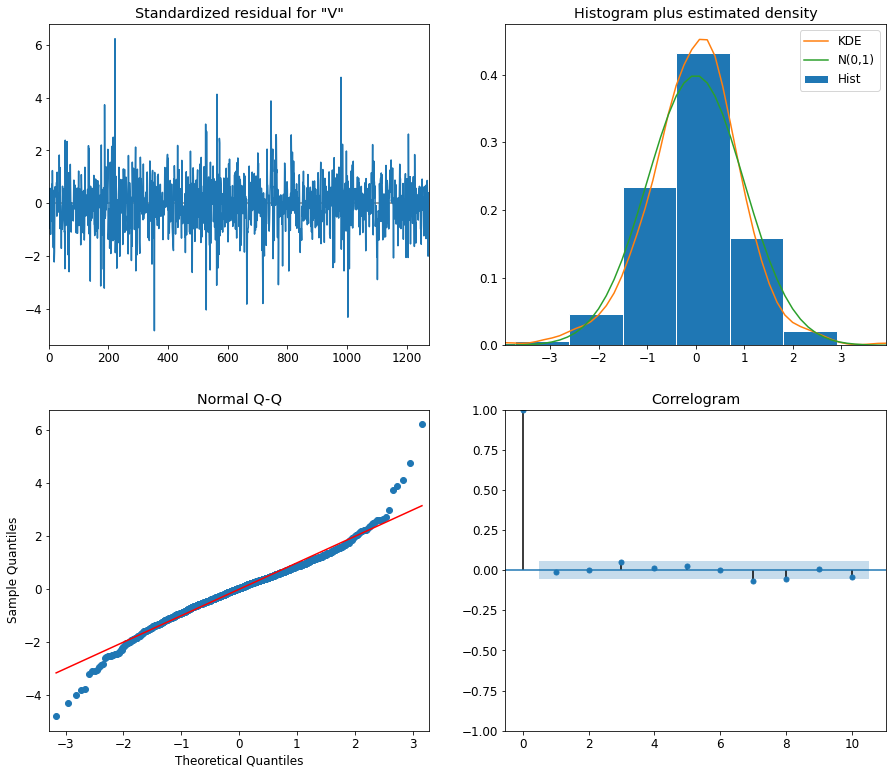

In [241]:
###Estimación de de los parámetros de la serie simulada
ARIMAa= sm.tsa.statespace.sarimax.SARIMAX(dtempst.dropna()[:1278], trend='c', order=[1,1,2])
ARIMAaa= sm.tsa.statespace.sarimax.SARIMAX(dtempst.dropna()[:1278], trend='n', order=[1,1,2])

presultarimaa = ARIMAa.fit()
presultarimaa1 = ARIMAaa.fit()
print(presultarimaa.summary(),presultarimaa1.summary())

#####Análisis de Residuales######

results_final6 = ARIMAaa.fit()
residuales5=results_final6.resid

## Hipótesis nula de no heterocedasticidad
print(results_final6.test_heteroskedasticity(method='breakvar')) #[Est. de prueba, p-valor]
## Hipótesis nula de normalidad
print(results_final6.test_normality(method='jarquebera'))
#1. Estadística de prueba
#2. El p valor
#3. Sesgo estimado de los datos
#4. Curtosis estimada
## Hipótesis nula indica que no se presenta correlación serial
results_final6.plot_diagnostics(figsize=(15,13))
#plt.show()

Al observar los residuales de los modelos propuestos se encontró que el mejor explica las autocorrelaciones es el modelo ARIMA(0,1,9).

#### <font color= 199EDC> <b> Gráficos de sumas acumulativas  </b> </font>

In [242]:
##Residuales Estandarizados
## Con MA(9)
Res_estand1=results_final4.standardized_forecasts_error.reshape(1278,)

Text(0.5, 1.0, 'Estadística Cusum')

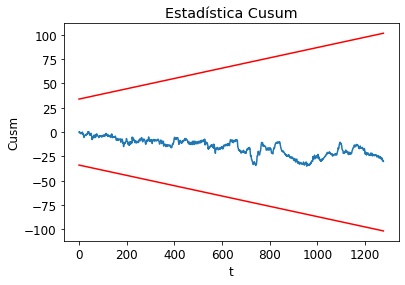

In [243]:
###Gráfico CUSUM
cum1=Res_estand1.cumsum()
N1=len(Res_estand1)
N1
Af_cusum1=0.948###Cuantil estadística cusum
LS1=Af_cusum1*math.sqrt(N1)+2*Af_cusum1*np.arange(1,N1+1)/math.sqrt(N1)
LI1=-LS1
plt.plot(cum1)
plt.plot(LS1,color='red')
plt.plot(LI1,color='red')
plt.xlabel("t")
plt.ylabel("Cusm")
plt.title('Estadística Cusum')

Text(0.5, 1.0, 'Estadística Cusumsq')

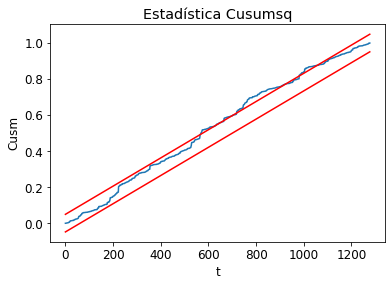

In [244]:
###Gráfico CUSUM_CUADRADO
cumq1=(Res_estand1**2).cumsum()/sum(Res_estand1**2)
co=0.04880####Valor del cuantil aproximado para cusumsq para n/2
LQS1=co+np.arange(1,N1+1)/N1
LQI1=-co+np.arange(1,N1+1)/N1
plt.plot(cumq1)
plt.plot(LQS1,color='red')
plt.plot(LQI1,color='red')
plt.xlabel("t")
plt.ylabel("Cusm")
plt.title('Estadística Cusumsq')

Como se ve en los gráficos anteriores, los parámetros parecen ser estables en el tiempo, mientras que la varianza parece presentar problemas.

#### <font color= 199EDC> <b> Predicciones </b> </font>

####STL

In [245]:
from statsmodels.tsa.api import STLForecast
from statsmodels.tsa.arima.model import ARIMA

stlf1 = STLForecast(Tempst[:1278], ARIMA, model_kwargs={"order": (0, 1, 9)},period=365)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


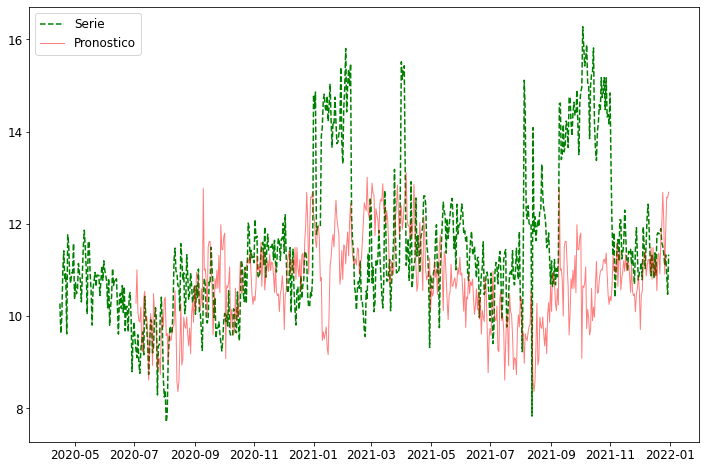

In [246]:
stlf_res1 = stlf1.fit()

forecast1 = stlf_res1.forecast(547)
ptemp=pd.Series(forecast1.values,index=Tempst[1278:].index)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1,1,1)
#Serie actual
ax.plot(Tempst.astype('float64')[1200:], '--', color="green", label='Serie')
# PronÃƒÂ³stico
ax.plot(ptemp, lw=1, color="red", alpha=0.5, label='Pronostico')
ax.legend(loc='upper left')
plt.draw()


####Suavizamiento Exponencial

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


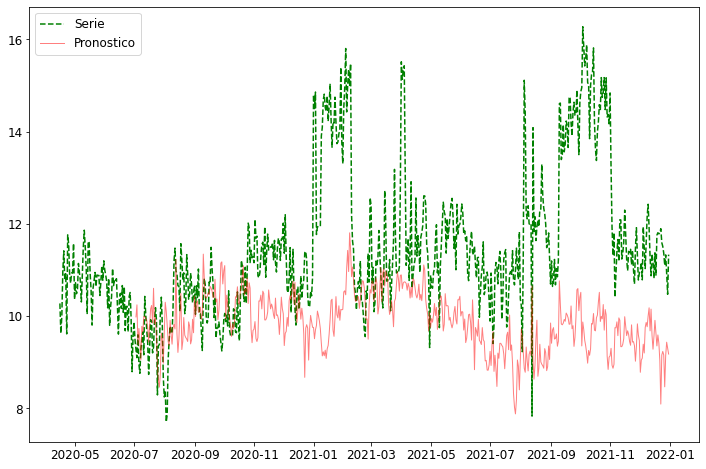

In [247]:
forecast2 = expotemp.forecast(547)
ptemp1=pd.Series(forecast2.values,index=Tempst[1278:].index)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1,1,1)
#Serie actual
ax.plot(Tempst.astype('float64')[1200:], '--', color="green", label='Serie')
# PronÃƒÂ³stico
ax.plot(ptemp1, lw=1, color="red", alpha=0.5, label='Pronostico')
ax.legend(loc='upper left')
plt.draw()

####ARIMA(0,1,9)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


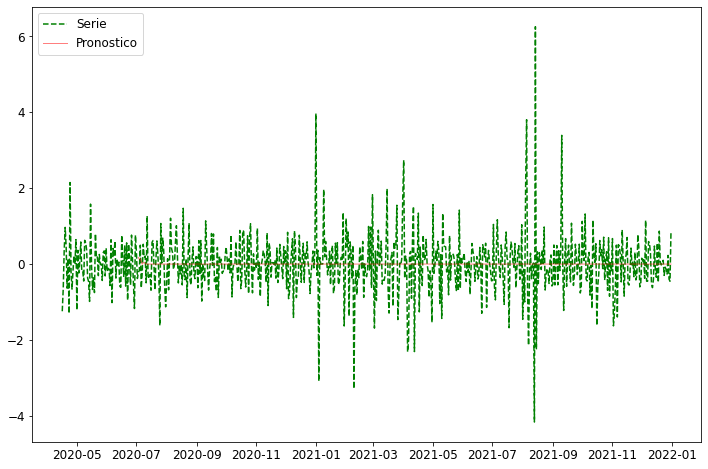

In [248]:
forecast3=presultpromi1.forecast(steps=547)


ptemp3=[forecast3+dtempst[1279:]]
ptemp3=pd.Series(forecast3.values,index=Tempst[1278:].index)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1,1,1)
#Serie actual
ax.plot(dtempst.astype('float64')[1200:], '--', color="green", label='Serie')
# PronÃƒÂ³stico
ax.plot(ptemp3, lw=1, color="red", alpha=0.5, label='Pronostico')
ax.legend(loc='upper left')
plt.draw()

#### <font color= 199EDC> <b>Error cuadrático medio </b> </font>

In [249]:
pred=(Tempst.iloc[1278:]-ptemp.values)**2
ECM=sum(pred)/len(pred) 

pred1=(Tempst.iloc[1278:]-ptemp1)**2
ECM1=sum(pred1)/len(pred1) 

pred2=(Tempst.iloc[1278:]-ptemp3)**2
ECM2=sum(pred2)/len(pred2) 

print('ECM STL:')
print(ECM)

print('\n ECM Suavizamiento exponencial:')
print(ECM1)

print('\n ECM MA(9):')
print(ECM2)


ECM STL:
3.713501788115492

 ECM Suavizamiento exponencial:
5.8634485697886

 ECM MA(9):
136.59733689677526


Por lo que se comporta mejor el modelo STL